# Quality Assessment for ERA5 Drought Indicator

Production date: 30-12-2025

*Please note that this repository is used for development and review, so quality assessments should be considered work in progress until they are merged into the main branch.*

Produced by: C3S2521 - National Physical Laboratory, Enis Gerxhalija and Dr. Olivier Burggraaf 



## 🌍 Use case: Retrieving drought indicators from the ERA5-Drought dataset 

## ❓ Quality assessment question
* **Are the drought indicators in the ERA5-Drought dataset consistent with and reproducible from ERA5 data?**
* **ANOTHER IDEA: Are the drought indicators in the ERA5-Drought dataset presented in a format that ensures optimal usability for users?**

According to the latest assessment report by the Intergovernmental Panel on Climate Change (IPCC), human-induced climate change is likely the primary driver behind the number of increased droughts and heavy precipitation since the 1950s [reference]. With further global warming at 1.5°C and above, heavy precipitation, flooding and drought events are projected to intensify and become more frequent in most regions of Africa, Asia, North America and Europe. The environmental, societal, and economical impact of such extreme weather events are far-reaching

* The impact on drought events have on health, economy and society.
* Economic impact of drought in UK (https://mcusercontent.com/8ed7ad7972fae058e8f4fb7e8/files/6d02e6e7-8639-a44d-5a8c-2313124ef699/Costs_of_climate_analysis_011225.pdf)
* Challenges in characterising droughts.
* Introducing the two drought indices.

**‘Context paragraph’ (no title/heading)** - a very short introduction before the assessment statement describing approach taken to answer the user question. One or two key references could be useful,  if the assessment summarises literature . These can be referenced directly in the text, like `[Rodriguez et. al. 2018](https://doi.org/10.1038/s41598-018-20628-2)` giving: [Rodriguez et. al. 2018](https://doi.org/10.1038/s41598-018-20628-2). For major references numerical labels like this should be used (which should also listed at the end) `Rodriguez et. al. 2018, [[1]](https://doi.org/10.1038/s41598-018-20628-2))`giving: Rodriguez et. al. 2018, [[1]](https://doi.org/10.1038/s41598-018-20628-2)). Please use DOI links where possible.


## 📢 Quality assessment statement

```{admonition} These are the key outcomes of this assessment
:class: note
* Conclusion 1
* Conclusion 2

## 📋 Methodology

Brief description of what this notebooks does (1–2 paragraphs) 

Table of contents (following jupyter-book format, see e.g. Atlas notebooks) 

```{note}

**[](section-1)**
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

**[](section-2)**
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

**[](section-3)**
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

**[](section-4)**
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.
 
**[](section-5)** 
 * Sub-steps or key points listed in bullet below. No strict requirement to match and link to sub-headings.

Any further notes on the method could go here (explanations, caveats or limitations).

## 📈 Analysis and results

(section-1)=
### 1. Section 1 title

#### Subsections
Describe what is done in this step/section and what the `code` in the cell does (**if code is included** - some assessment may review literature or reports like PQARs for ECVs, in which case, a markdown file could be provided instead). Note that some details may be better placed in code comments, rather than in the text above the code cell, to help the flow of the Notebook.

**Code:**

* Cell output should be cleaned up as needed (right click the cell after it has run and delete the output if needed), this can also be done with the `'hide-output'` cell tag, added under 'Common Tools -> Cell Tags' on the right in Jupyter Lab (under the cog icon).
* Please consider when cell output would be useful to include, such as printing the summary of the xarray data cube, or an example image. 
* Please link to any non-standard libraries in the references, including the functions from B-Open (a standard line on this is included in the references section).
* The code cells will be adjusted to be 'collapsed by default' when the Jupyter Book page is built.

#### Import Libraries

In [1]:
# Input / Output
from pathlib import Path
import earthkit.data as ekd
import warnings

# General data handling
import numpy as np
import pandas as pd
import xarray as xr
from functools import partial

# Visualisation
import earthkit.plots as ekp
from earthkit.plots.styles import Style
import matplotlib.pyplot as plt
plt.rcParams["grid.linestyle"] = "--"
from tqdm import tqdm  # Progress bars

# Visualisation in Jupyter book -- automatically ignored otherwise
try:
    from myst_nb import glue
except ImportError:
    glue = None

import calendar
import earthkit.data
import scipy.stats as stats    

#### Import total precipitation data (1940-2025 Monthly Means) from ERA5 analysis. 
##### (https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels-monthly-means?tab=download)

In [3]:
tp_reanal_dataset = "reanalysis-era5-single-levels-monthly-means"
tp_reanal_request = {
    "product_type": [
        "monthly_averaged_reanalysis"
    ],
    "variable": ["total_precipitation"],
    "year": [
        "1940", "1941", "1942",
        "1943", "1944", "1945",
        "1946", "1947", "1948",
        "1949", "1950", "1951",
        "1952", "1953", "1954",
        "1955", "1956", "1957",
        "1958", "1959", "1960",
        "1961", "1962", "1963",
        "1964", "1965", "1966",
        "1967", "1968", "1969",
        "1970", "1971", "1972",
        "1973", "1974", "1975",
        "1976", "1977", "1978",
        "1979", "1980", "1981",
        "1982", "1983", "1984",
        "1985", "1986", "1987",
        "1988", "1989", "1990",
        "1991", "1992", "1993",
        "1994", "1995", "1996",
        "1997", "1998", "1999",
        "2000", "2001", "2002",
        "2003", "2004", "2005",
        "2006", "2007", "2008",
        "2009", "2010", "2011",
        "2012", "2013", "2014",
        "2015", "2016", "2017",
        "2018", "2019", "2020",
        "2021", "2022", "2023",
        "2024", "2025"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "time": ["00:00"],
    "data_format": "netcdf",
    "download_format": "unarchived"
}

era5_monthly_mean_reanal = ekd.from_source("cds", tp_reanal_dataset, tp_reanal_request) # Sends request for this dataset to CDS.
era5_monthly_mean_reanal = era5_monthly_mean_reanal.to_xarray(compat="equals")  # Converts to xarray.Dataset

2025-12-29 15:18:36,539 INFO [2025-12-03T00:00:00Z] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.


####  Import ERA5-Probability of Zero precipitation.
##### Adjust for bad reading of data.

In [ ]:
accum_period = [1, 3, 6, 12, 24, 36, 48]

probability_dataset = []

for period in accum_period:
    prob_zero_dataset = "derived-drought-historical-monthly"
    prob_zero_request = {
        "variable": ["probability_of_zero_precipitation_spi"],
        "accumulation_period": [
            f"{period}",
        ],
        "version": "1_0",
        "product_type": ["reanalysis"],
        "dataset_type": "consolidated_dataset",
        "month": [
            "01", "02", "03",
            "04", "05", "06",
            "07", "08", "09",
            "10", "11", "12"
        ]
    }
    prob_zero = ekd.from_source("cds", prob_zero_dataset, prob_zero_request) # Sends request for this dataset to CDS.
    prob_zero = prob_zero.to_xarray(compat="equals") # Converts to xarray.    
    prob_zero_ds = prob_zero_ds.assign({f"prob_zero_{period}": prob_zero_ds["p_zero"]}) # double check what this variable is.
    
    probability_dataset.append(prob_zero_ds[[f"prob_zero_{period}"]])  # keep only the renamed var
    
prob_zero_all = xr.merge(probability_dataset, compat="override")

#### Import ERA5-Drought Shapiro-Wilks SPI Significance Test
##### Adjust for bad reading of data.

In [ ]:
accum_period = [1, 3, 6, 12, 24, 36, 48]

normality_dataset = "derived-drought-historical-monthly"

quality_dataset = []

for period in accum_period:
    norm_request = {
        "variable": ["test_for_normality_spi"],
        "accumulation_period": [
            f"{period}",
        ],
        "version": "1_0",
        "product_type": ["reanalysis"],
        "dataset_type": "consolidated_dataset",
        "month": [
            "01", "02", "03",
            "04", "05", "06",
            "07", "08", "09",
            "10", "11", "12"
        ]
    }
    quality_spi = ekd.from_source("cds", normality_dataset, norm_request) # Sends request for this dataset to CDS.
    quality_spi = quality_spi.to_xarray(compat="equals") # Converts to xarray.
    quality_spi_ds = quality_spi.sel(lat=9.25,lon=40.5, method="nearest")
    
    quality_spi_ds = quality_spi_ds.assign({f"significance_{period}": quality_spi_ds["significance"]})
    
    quality_dataset.append(quality_spi_ds[[f"significance_{period}"]])  # keep only the renamed var
    
quality_spi_all = xr.merge(quality_dataset, compat="override")

#### Import ERA5-Drought Shapiro-Wilks SPEI Significance Test
##### Adjust for bad reading of data.

In [ ]:
accum_period = [1, 3, 6, 12, 24, 36, 48]

normality_dataset = "derived-drought-historical-monthly"

quality_dataset = []

for period in accum_period:
    norm_request_1 = {
        "variable": ["test_for_normality_spei"],
        "accumulation_period": [
            f"{period}",
        ],
        "version": "1_0",
        "product_type": ["reanalysis"],
        "dataset_type": "consolidated_dataset",
        "month": [
            "01", "02", "03",
            "04", "05", "06",
            "07", "08", "09",
            "10", "11", "12"
        ]
    }
    quality_spei = ekd.from_source("cds", normality_dataset, norm_request_1) # Sends request for this dataset to CDS.
    quality_spei = quality_spei.to_xarray(compat="equals") # Converts to xarray.
    quality_spei_ds = quality_spei.sel(lat=9.25,lon=40.5, method="nearest")
    
    quality_spei_ds = quality_spei_ds.assign({f"significance_{period}": quality_spei_ds["significance"]})
    
    quality_dataset.append(quality_spei_ds[[f"significance_{period}"]])  # keep only the renamed var
    
quality_spei_all = xr.merge(quality_dataset, compat="override")

#### Import ERA5-Drought SPI (one location, all accumulation windows).
##### Weaving data as request too big for entire time range.

In [ ]:
drought_dataset = "derived-drought-historical-monthly"

spi_request1 = {
    "variable": ["standardised_precipitation_index"],
    "accumulation_period": [
        "1",
        "3",
        "6",
        "12",
        "24",
        "36",
        "48"
    ],
    "version": "1_0",
    "product_type": ["reanalysis"],
    "dataset_type": "consolidated_dataset",
    "year": [
        "1940", "1941", "1942",
        "1943", "1944", "1945",
        "1946", "1947", "1948",
        "1949", "1950", "1951",
        "1952", "1953", "1954",
        "1955", "1956", "1957",
        "1958", "1959", "1960",
        "1961", "1962", "1963",
        "1964", "1965", "1966",
        "1967", "1968", "1969",
        "1970", "1971", "1972",
        "1973", "1974", "1975",
        "1976", "1977", "1978",
        "1979", "1980"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "area": [9.45, 40.25, 8.95, 40.75]
}

spi_request2 = {
    "variable": ["standardised_precipitation_index"],
    "accumulation_period": [
        "1",
        "3",
        "6",
        "12",
        "24",
        "36",
        "48"
    ],
    "version": "1_0",
    "product_type": ["reanalysis"],
    "dataset_type": "consolidated_dataset",
    "year": [
        "1981", "1982", "1983",
        "1984", "1985", "1986",
        "1987", "1988", "1989",
        "1990", "1991", "1992",
        "1993", "1994", "1995",
        "1996", "1997", "1998",
        "1999", "2000", "2001",
        "2002", "2003", "2004",
        "2005", "2006", "2007",
        "2008", "2009", "2010",
        "2011", "2012", "2013",
        "2014", "2015", "2016",
        "2017", "2018", "2019",
        "2020"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "area": [9.45, 40.25, 8.95, 40.75] # Ethiopia
}

In [ ]:
data_drought = ekd.from_source("cds", drought_dataset, spi_request1, spi_request2) # Sends request for this dataset to CDS.
data_drought = data_drought.to_xarray(compat="equals") # Converts to xarray.
data_drought = data_drought.sel(lat=9.25,lon=40.5, method="nearest")

#### Import ERA5 Precipitation & PEV Data for SPEI Calculation.

In [ ]:
##### Import Total Precipitation #######

tp_rean_precip = ekd.from_source("cds", tp_reanal_dataset, tp_reanal_request) # Sends request for this dataset to CDS.
tp_rean_precip = tp_rean_precip.to_xarray(compat="equals")  # Converts to xarray.Dataset

tp_rean_precip_focus = tp_rean_precip.sel(
    latitude=9.25, longitude=40.5, method='nearest'
).sel(valid_time=slice("1940-01-01", "2020-12-31"))

##### Import PEV #######

dataset = "reanalysis-era5-single-levels-monthly-means"
request = {
    "product_type": ["monthly_averaged_reanalysis"],
    "variable": [
        "potential_evaporation"
    ],
    "year": [
        "1940", "1941", "1942",
        "1943", "1944", "1945",
        "1946", "1947", "1948",
        "1949", "1950", "1951",
        "1952", "1953", "1954",
        "1955", "1956", "1957",
        "1958", "1959", "1960",
        "1961", "1962", "1963",
        "1964", "1965", "1966",
        "1967", "1968", "1969",
        "1970", "1971", "1972",
        "1973", "1974", "1975",
        "1976", "1977", "1978",
        "1979", "1980", "1981",
        "1982", "1983", "1984",
        "1985", "1986", "1987",
        "1988", "1989", "1990",
        "1991", "1992", "1993",
        "1994", "1995", "1996",
        "1997", "1998", "1999",
        "2000", "2001", "2002",
        "2003", "2004", "2005",
        "2006", "2007", "2008",
        "2009", "2010", "2011",
        "2012", "2013", "2014",
        "2015", "2016", "2017",
        "2018", "2019", "2020",
        "2021", "2022", "2023",
        "2024", "2025"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "time": ["00:00"],
    "data_format": "netcdf",
    "download_format": "unarchived"
}

pev_rean = ekd.from_source("cds", dataset, request) # Sends request for this dataset to CDS.
pev_rean = pev_rean.to_xarray() # Converts to xarray.



In [ ]:
spi_ens_dataset = "derived-drought-historical-monthly"
spi_ens_request = {
    "variable": ["standardised_precipitation_index"],
    "accumulation_period": ["12"], # 1 is also already downloaded.
    "version": "1_0",
    "product_type": ["ensemble_members"],
    "dataset_type": "consolidated_dataset",
    "year": [
        "1940", "1941", "1942",
        "1943", "1944", "1945",
        "1946", "1947", "1948",
        "1949", "1950", "1951",
        "1952", "1953", "1954",
        "1955", "1956", "1957",
        "1958", "1959", "1960",
        "1961", "1962", "1963",
        "1964", "1965", "1966",
        "1967", "1968", "1969",
        "1970", "1971", "1972",
        "1973", "1974", "1975",
        "1976", "1977", "1978",
        "1979", "1980", "1981",
        "1982", "1983", "1984",
        "1985", "1986", "1987",
        "1988", "1989", "1990",
        "1991", "1992", "1993",
        "1994", "1995", "1996",
        "1997", "1998", "1999",
        "2000", "2001", "2002",
        "2003", "2004", "2005",
        "2006", "2007", "2008",
        "2009", "2010", "2011",
        "2012", "2013", "2014",
        "2015", "2016", "2017",
        "2018", "2019", "2020",
        "2021", "2022", "2023",
        "2024", "2025"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "area":[10, 40, 9, 41]
}

point_drought_ens_ = ekd.from_source("cds", spi_ens_dataset, spi_ens_request) # Sends request for this dataset to CDS.
point_drought_ens_ = point_drought_ens_.to_xarray(compat="equals") # Converts to xarray.

point_drought_ens_ = point_drought_ens_.sel(lat = 9.25, lon = 40.5) # note there are duplicate timestamps. each one is a ensemble member.

#### Read in SPI Calculation functions

In [2]:
def accum_var(data, var='tp', acc_periods=[1, 3, 6, 12, 24, 36, 48], time_dim=None):
    """
    Compute the precipitation / potential evaporation accumulation window. 
    
    1. Convert precipitation/potential evaporation from meters to millimeters.
    2. Compute monthly totals (accounting for days in month).
    3. Add rolling accumulation windows on monthly totals.
    """

    # Detect time dimension if not provided
    if time_dim is None:
        if 'valid_time' in data.dims:
            time_dim = 'valid_time'
        elif 'forecast_reference_time' in data.dims:
            time_dim = 'forecast_reference_time'
        elif "time" in data.dims:
            time_dim = "time"
        else:
            raise ValueError("No valid time dimension found. Expected 'valid_time' or 'forecast_reference_time'.")

    # Ensure time is sorted
    data = data.sortby(time_dim)
    
    # Step 1: Convert to mm
    data[f'{var}_mm'] = data[var] * 1000

    # Step 2: Compute monthly totals
    time_index = pd.to_datetime(data[time_dim].values)
    
    days_in_month = xr.DataArray(
        time_index.days_in_month,
        coords={time_dim: data[time_dim]},
        dims=[time_dim]
    )

    data[f'{var}_mm_monthly_total'] = data[f'{var}_mm'] * days_in_month

    # Step 3: Add rolling accumulation windows
    for period in acc_periods:
        rolling_sum = data[f"{var}_mm_monthly_total"].rolling({time_dim: period}, center=False).sum()
        data[f'{var}_mm_accum_{period}m'] = rolling_sum

    return data
    
def fit_monthly_distributions_xr(data, accum_periods, start_ref, end_ref, time_dim=None, var = None):
    """
    Fit gamma/genlogistic distributions for each month and accumulation period using xarray.
    """
    import numpy as np
    from scipy import stats

    monthly_params = {}

    # Detect time dimension if not provided
    if time_dim is None:
        if 'valid_time' in data.dims:
            time_dim = 'valid_time'
        elif 'forecast_reference_time' in data.dims:
            time_dim = 'forecast_reference_time'
        else:
            raise ValueError("No valid time dimension found. Expected 'valid_time' or 'forecast_reference_time'.")

    # Slice reference period
    ref_data = data.sel({time_dim: slice(start_ref, end_ref)})
    
    if var is None:
        if 'tp' in data.data_vars:
            var = 'tp'
        elif 'pev' in data.data_vars:
            var = 'pev'
        else:
            raise ValueError("No valid variable dimension found. Expected 'tp' or 'pev'.")

    for period in accum_periods:
        var_name = f'{var}_mm_accum_{period}m'
        for month in range(1, 13):
            # Select month subset
            month_subset = ref_data[var_name].where(ref_data[time_dim].dt.month == month, drop=True)

            # Drop NaNs and flatten
            values = month_subset.values.flatten()
            values = values[~np.isnan(values)]
            if len(values) > 0:
                if var == "tp":
                    alpha, loc, beta = stats.gamma.fit(values)
                elif var == "pev" or "wb":
                    alpha, loc, beta = stats.genlogistic.fit(values) # alpha is shape parameters, loc = location, beta is scale.

            monthly_params[(month, period)] = (alpha, loc, beta)
    return monthly_params

def compute_monthly_series_xr(data, accum_periods, monthly_params, time_dim=None, var_dim = None):
    """
    Compute SPI time series for each accumulation period using fitted gamma parameters.
    Returns an xarray Dataset with SPI variables.
    """
    import numpy as np
    import xarray as xr
    from scipy import stats

    # Detect time dimension if not provided
    if time_dim is None:
        if 'valid_time' in data.dims:
            time_dim = 'valid_time'
        elif 'forecast_reference_time' in data.dims:
            time_dim = 'forecast_reference_time'
        else:
            raise ValueError("No valid time dimension found. Expected 'valid_time' or 'forecast_reference_time'.")

    
    # Detect var dimension if not provided
    if var_dim is None:
        if 'tp' in data.data_vars:
            var_dim = 'tp'
        elif 'pev' in data.data_vars:
            var_dim = 'pev'
        else:
            raise ValueError("No valid variable dimension found. Expected 'tp' or 'pev'.")
            
    spi_vars = {}
    cdf_vars = {}

    for period in accum_periods:
        var_name = f'{var_dim}_mm_accum_{period}m'

        spi_array = xr.full_like(data[var_name], np.nan)
        cdf_array = xr.full_like(data[var_name], np.nan)

        for month in range(1, 13):
            alpha, loc, beta = monthly_params[(month, period)]

            # Select month subset
            months = data[time_dim].dt.month
            month_mask = (months == month)

            values = data[var_name].where(month_mask)

            # Compute CDF and SPI
            if var_dim == "tp":
                cdf = stats.gamma.cdf(values, a=alpha, loc=loc, scale=beta)
                spi = stats.norm.ppf(cdf, loc=0, scale=1)
            elif var_dim in ("pev", "wb"):
                cdf = stats.genlogistic.cdf(values, c=alpha, loc=loc, scale=beta)
                spi = stats.norm.ppf(cdf, loc=0, scale=1)
                
            # Assign values to arrays
            spi_array = spi_array.where(~month_mask, spi)
            cdf_array = cdf_array.where(~month_mask, cdf)

        # Compute CDF and SPI
        if var_dim == "tp":
            spi_vars[f'SPI_{period}m'] = spi_array
            cdf_vars[f'CDF_{period}m'] = cdf_array
        elif var_dim in ("pev", "wb"):
            spi_vars[f'SPEI_{period}m'] = spi_array
            cdf_vars[f'CDF_{period}m'] = cdf_array

    return xr.Dataset(spi_vars, coords=data.coords), xr.Dataset(cdf_vars, coords=data.coords)


def compute_spi_dataset(data, accum_periods, n_points = 1000):

    """
    Fit gamma distribution for each month and accumulation period,
    then compute SPI, CDF, and PDF for a linspace of precipitation values.
    """

    result_vars = {}

    for period in accum_periods:
        var_name = f'tp_mm_accum_{period}m'
        
        tp_values = data[var_name]

        # Prepare storage lists
        spi_list, cdf_list, pdf_list, precip_list = [], [], [], []

        for month in range(1, 13):
            # Select month subset
            month_data = tp_values.where(tp_values['valid_time.month'] == month, drop=True).values
            month_data = month_data[month_data > 0]                
            month_data = month_data[~np.isnan(month_data)]

                
            # Fit gamma distribution
            alpha, loc, beta = stats.gamma.fit(month_data, floc=0)

            vals = np.linspace(month_data.min(), month_data.max(), n_points)

            # Compute PDF, CDF, SPI
            cdf_vals = stats.gamma.cdf(vals, a=alpha, loc=loc, scale=beta)
            spi_vals = stats.norm.ppf(cdf_vals)
            pdf_vals = stats.gamma.pdf(vals, a=alpha, loc=loc, scale=beta)

            # Append to lists
            precip_list.append(vals)
            spi_list.append(spi_vals)
            cdf_list.append(cdf_vals)
            pdf_list.append(pdf_vals)

            
        # Convert lists to DataArrays
        months = np.arange(1, 13)
        result_vars[f'precip_{period}m'] = xr.DataArray(precip_list, dims=['month', 'value_index'], coords={'month': months})
        result_vars[f'SPI_{period}m'] = xr.DataArray(spi_list, dims=['month', 'value_index'], coords={'month': months})
        result_vars[f'CDF_{period}m'] = xr.DataArray(cdf_list, dims=['month', 'value_index'], coords={'month': months})
        result_vars[f'PDF_{period}m'] = xr.DataArray(pdf_list, dims=['month', 'value_index'], coords={'month': months})

    return xr.Dataset(result_vars)


(section-2)=
### Calculating ERA5-Drought SPI (at one location)

#### 1. Calculate moving average for different accumulation periods.

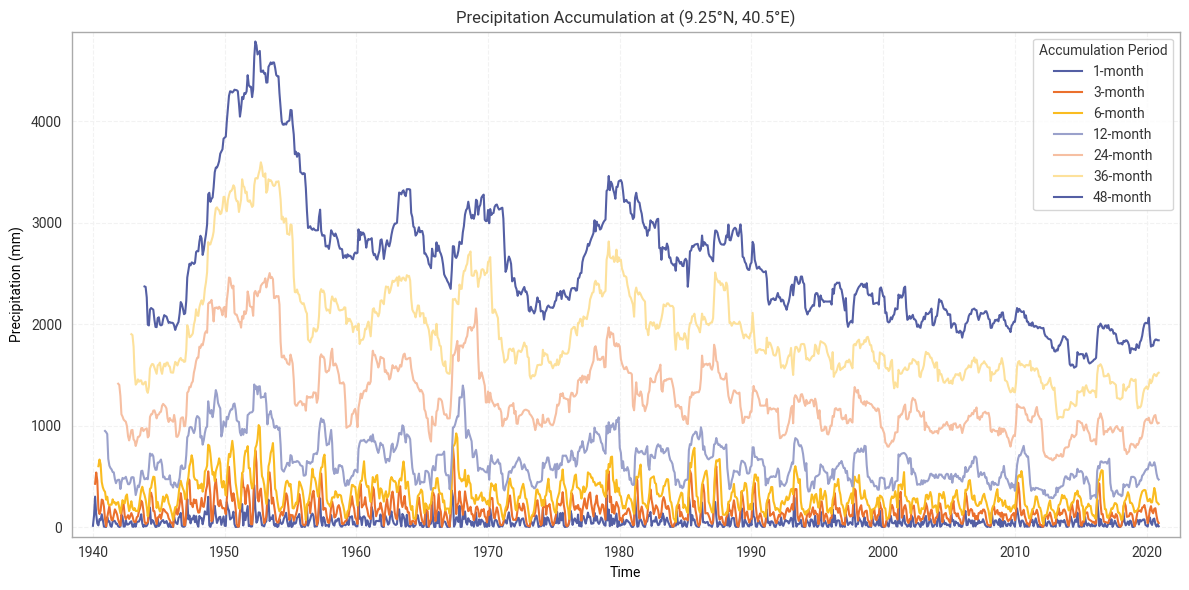

In [32]:
acc_periods = [1, 3, 6, 12, 24, 36, 48]

# Select the grid point and time slice for Ethiopia

point_ds = era5_monthly_mean_reanal.sel(valid_time=slice("1940-01-01", "2020-12-31"))
point_ds = point_ds.sel(latitude= 9.25, longitude= 40.5)
point_ds = accum_var(point_ds, var = "tp")

plt.figure(figsize=(12, 6))
for p in acc_periods:
    var_name = f'tp_mm_accum_{p}m'
    plt.plot(point_ds['valid_time'].values, point_ds[var_name].values, label=f'{p}-month')

# Customize plot
plt.title('Precipitation Accumulation at (9.25°N, 40.5°E)')
plt.xlabel('Time')
plt.ylabel('Precipitation (mm)')
plt.legend(title='Accumulation Period')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Fit gamma distribution (over calendar months) to different accumulation periods.

In [10]:
accum_periods = [1, 3, 6, 12, 24, 36, 48]

start_ref, end_ref  = "1991-01-01", "2020-12-01"

focus_ds = point_ds.sel({"valid_time": slice(start_ref, end_ref)})

# Fit gamma distributions
gamma_params = fit_monthly_distributions_xr(point_ds, accum_periods, start_ref, end_ref, var = "tp")

#### 3. Compute SPI series


In [11]:
# Compute SPI series
spi_ds, cdf_ds = compute_monthly_series_xr(point_ds, accum_periods, gamma_params)

In [ ]:
from scipy.interpolate import make_interp_spline
import re

# Find matching precip/SPI variable pairs like precip_1m / SPI_1m
precip_vars = {int(re.search(r'_(\d+)m$', v).group(1)): v
               for v in ds_tp.data_vars if re.fullmatch(r'precip_\d+m', v)}
spi_vars    = {int(re.search(r'_(\d+)m$', v).group(1)): v
               for v in ds_tp.data_vars if re.fullmatch(r'SPI_\d+m', v)}

windows = sorted(set(precip_vars) & set(spi_vars))

plt.figure(figsize=(9, 6))
for w in windows:
    tp = ds_tp[precip_vars[w]].sel(month=2).values.ravel()
    spi = ds_tp[spi_vars[w]].sel(month=2).values.ravel()
    idx = np.argsort(tp)
    tp = tp[idx]
    spi = spi[idx]
    grad = np.gradient(spi, tp)
    plt.plot(tp, grad, linewidth=2, label=f"{w}-month")

plt.xlabel("Precipitation (mm)")
plt.ylabel("SPI Uncertainty (dSPI/dPrecip)")
plt.title("Uncertainty in SPI vs Precipitation — January (all accumulation windows)")
plt.grid(True, alpha=0.3)
plt.legend(title="Accumulation window")
plt.tight_layout()
plt.show()


#TODO: Might be good to have some dropdowns so users can look at the month / accumulation period of choice.

In [ ]:
w = 3  # accumulation window in months (e.g., 1, 3, 6, 12)

precip_var = next(v for v in ds_tp.data_vars if re.fullmatch(rf'precip_{w}m', v))
spi_var    = next(v for v in ds_tp.data_vars if re.fullmatch(rf'SPI_{w}m', v))

plt.figure(figsize=(9, 6))
for m in range(1, 13):
    tp  = ds_tp[precip_var].sel(month=m).values.ravel()
    spi = ds_tp[spi_var].sel(month=m).values.ravel()
    idx = np.argsort(tp)
    tp, spi = tp[idx], spi[idx]
    grad = np.gradient(spi, tp)
    plt.plot(tp, grad, linewidth=1.8, label=f"Month {m}")

plt.xlabel("Precipitation (mm)")
plt.ylabel("SPI Uncertainty (dSPI/dPrecip)")
plt.title(f"Uncertainty vs Precipitation — All Months, {w}-month accumulation")
plt.grid(True, alpha=0.3)
plt.legend(ncol=3, fontsize=9, title="Month")
plt.tight_layout()
plt.show()


In [ ]:
month_choice = 12
tp_choice = point_ds[f"tp_mm_accum_{month_choice}m"].sel(valid_time=slice("1990-01-01", "2020-12-31"))
spi_choice = spi_ds[f"SPI_{month_choice}m"].sel(valid_time=slice("1990-01-01", "2020-12-31"))
cdf_choice = cdf_ds[f"CDF_{month_choice}m"].sel(valid_time=slice("1990-01-01", "2020-12-31"))

fig, ax1 = plt.subplots(figsize=(10, 5))

# First axis (left)
color1 = 'blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('tp (mm)', color=color1)
ax1.scatter(tp_choice.valid_time, tp_choice.values, color=color1, linestyle='-', marker='o', label='DF Ref')
ax1.tick_params(axis='y', labelcolor=color1)

# Second axis (right)
ax2 = ax1.twinx()  # Create second y-axis
color2 = "red"
ax2.set_ylabel('SPI', color=color2)
ax2.plot(spi_choice.valid_time, spi_choice.values, color=color2, linestyle='--', marker='x', label='SPI Ref')
ax2.tick_params(axis='y', labelcolor=color2)

# Title and grid
plt.title(f'SPI with Precipitation, {month_choice}-month window.')
fig.tight_layout()
plt.show()


#### 4. Calculating historical ratio of months without precipitation and finding zero adjusted SPI (ref dataset)

In [12]:
accum_periods = [1, 3, 6, 12, 24, 36, 48]

def zero_precip_monthly_xr(data, cdf_spi_ds, accum_periods, start_ref="1991-01-01", end_ref="2020-12-01"):
    """
    Adjust CDF for zero precipitation probability in xarray.
    """
    # Slice reference period
    ref_data = data.sel(valid_time=slice(start_ref, end_ref))
    
    adjusted_cdf_vars = {}
    stats_summary = []

    for period in accum_periods:
        var_name = f'tp_mm_accum_{period}m'
        cdf_var = f'CDF_{period}m'
        adjusted_cdf = cdf_spi_ds[cdf_var].copy()

        for month in range(1, 13):
            # Select month subset
            month_subset = ref_data[var_name].where(ref_data['valid_time.month'] == month, drop=True)
            n_zero = (month_subset <= 0.01).sum().compute().item() # What is the threshold value?
            n_month = month_subset.count().compute().item()

            if n_zero > 0:
                # Probability of zero precipitation
                p_zero = (n_zero + 1) / (2 * (n_month + 1))
            else: # do we still need to adjust if there are no months with zero precipitation??
                p_zero = 0
                
            ratio_zero = n_zero / n_month

            # Adjust CDF for this month
            mask = data['valid_time.month'] == month
            
            adjusted_cdf = adjusted_cdf.where(~mask, p_zero + (1 - p_zero) * cdf_spi_ds[cdf_var])
            
            # Append summary
            stats_summary.append({
                "Month": month,
                "SPI": period,
                "Zero-Precip Count": int(n_zero),
                "Total Months": int(n_month),
                "Prob Zero Precip": p_zero,
                "Historical Ratio": ratio_zero,
            })

        adjusted_cdf_vars[cdf_var] = adjusted_cdf

    stats_summary_df = pd.DataFrame(stats_summary)
    adjusted_cdf_ds = xr.Dataset(adjusted_cdf_vars, coords=data.coords)

    return stats_summary_df, adjusted_cdf_ds

stats_sum, adjusted_cdf_ds = zero_precip_monthly_xr(point_ds, cdf_ds, accum_periods)

#### 5. Adjust SPI values with zero precipitation probability.

In [16]:
from scipy import stats

accum_periods = [1, 3, 6, 12, 24, 36, 48]

spi_vars = {}

for period in accum_periods:
    cdf_data = adjusted_cdf_ds[f"CDF_{period}m"]
    spi_vals = stats.norm.ppf(np.clip(cdf_data, 1e-16, 1 - 1e-16), loc=0, scale=1)
    spi_data = xr.DataArray(spi_vals, coords=cdf_data.coords, attrs={"long_name": "SPI"})
    spi_vars[f"SPI_{period}m"] = spi_data

adjusted_spi_ds = xr.Dataset(spi_vars, coords=adjusted_cdf_ds.coords)


#### 6. Shapiro-Wilks Test on Data

In [18]:
def shapiro_monthly_test(spi_ds, accum_periods = [1, 3, 6, 12, 24, 36, 48], months = range(1,13)):
    results = []
    # spi_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    spi_ref = spi_ds.sel(valid_time=slice("1991-01-31", "2020-12-31"))
    for period in accum_periods:
        data = spi_ref[f"SPI_{period}m"]
        for month in months:
            month_data = data.where(data.valid_time.dt.month == month, drop=True).values
            month_data = month_data[np.isfinite(month_data)]  # remove inf/-inf

            stat, pval = stats.shapiro(month_data, nan_policy="omit")
            
            normality = 0 if pval < 0.05 else 1

            results.append((month, period, stat, pval,normality))
        
    # Convert to DataFrame
    df_shapiro_results = pd.DataFrame(results, columns=["Month", "SPI", "Statistic", "P-Value","Normality (1=Normal)"])

    return df_shapiro_results
    
df_shapiro_results = shapiro_monthly_test(spi_ds)

#### COMPARISON: Calculated vs ERA5 Shapiro-Wilks Test 

In [ ]:
# pick which one

# quality_spi_all["significance"].compute()
# df_shapiro_results.loc[df_shapiro_results["SPI"]==48]

#### COMPARISON: Plot of Calculated vs Derived SPI side-by-side. (every window, with flags).

In [ ]:
accum_periods = [1, 3, 6, 12, 24, 36, 48]

# Create a 4x4 grid of subplots
fig, axs = plt.subplots(4, 2, figsize=(16, 12), sharex=True, sharey=True, constrained_layout=True)
fig.suptitle('ERA5-Drought SPI vs Calculated SPI for varying windows.', fontsize=16)

# Flatten axs for easy indexing
axs = axs.flatten()

for position, period in enumerate(accum_periods):
    ax = axs[position]

    # Plot ERA5 drought SPI
    ax.plot(data_drought[f"SPI{period}"].time,
            data_drought[f"SPI{period}"],
            label=f"ERA5_Drought-SPI{period}",
            color="tab:blue")

    # Plot calculated SPI
    ax.plot(adjusted_spi_ds[f"SPI_{period}m"].valid_time,
            adjusted_spi_ds[f"SPI_{period}m"],
            label=f"Calculated SPI{period}",
            color="tab:orange")

    # Title for each subplot
    ax.sharex(axs[0])
    ax.set_title(f"{period}-Month Window", fontsize=10)
    ax.set_xlabel('Date')
    ax.set_ylabel('SPI')    
    ax.grid(True)

# Remove unused axes
for i in range(len(accum_periods), len(axs)):
    fig.delaxes(axs[i])

# Add a single legend for the whole figure
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper left", ncol=2, frameon=True)
plt.show()

#### COMPARISON: Plot of residuals for each accumulation window.

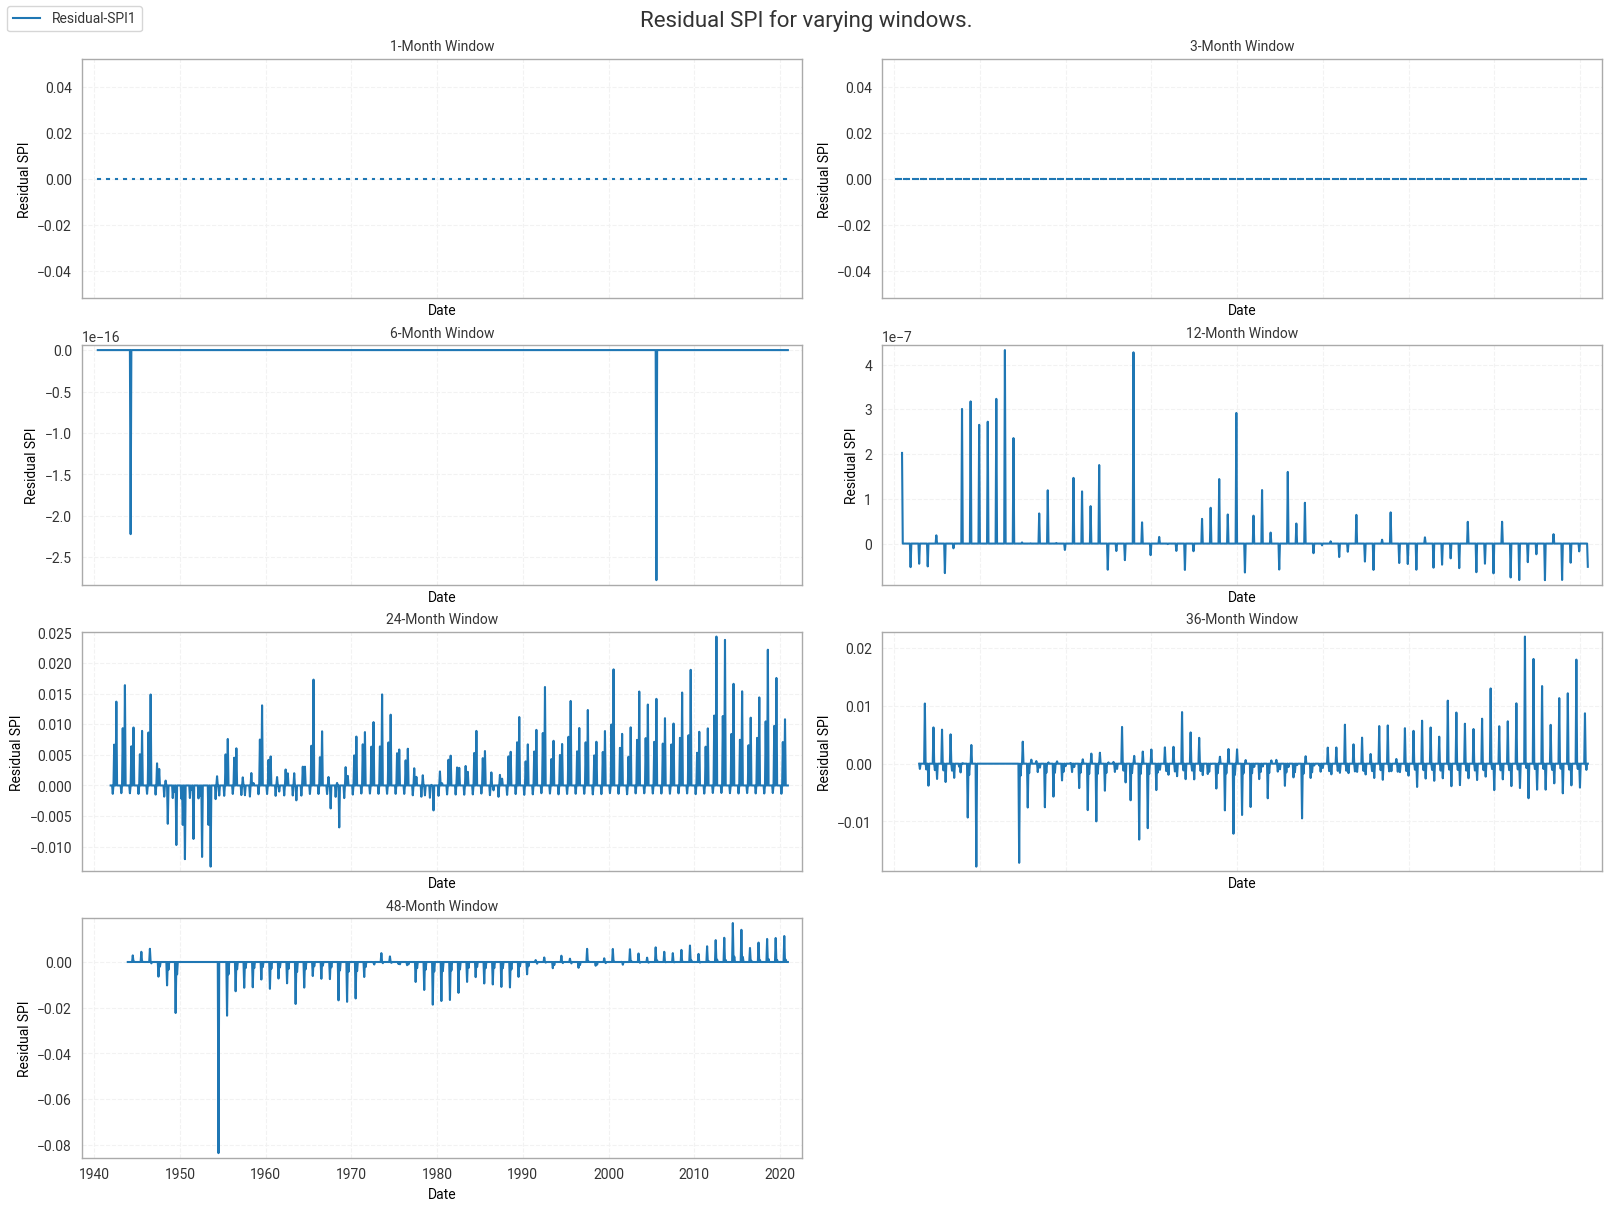

In [25]:
accum_periods = [1, 3, 6, 12, 24, 36, 48]

adjusted_spi_ds_focus = adjusted_spi_ds.rename({
    "valid_time": "time",
    "latitude": "lat",
    "longitude": "lon",
}) # for alignment

# Create a 4x4 grid of subplots
fig, axs = plt.subplots(4, 2, figsize=(16, 12), sharex=True, sharey=False, constrained_layout=True)
fig.suptitle('Residual SPI for varying windows.', fontsize=16)

# Flatten axs for easy indexing
axs = axs.flatten()

for position, period in enumerate(accum_periods):
    ax = axs[position]
    residual  = adjusted_spi_ds_focus[f"SPI_{period}m"] - data_drought[f"SPI{period}"]
    # Plot residual between ERA5-SPI & Calculated-SPI
    ax.plot(residual.time,
            residual,
            label=f"Residual-SPI{period}",
            color="tab:blue")

    # Title for each subplot
    ax.sharex(axs[0])
    ax.set_title(f"{period}-Month Window", fontsize=10)
    ax.set_xlabel('Date')
    ax.set_ylabel('Residual SPI')    
    ax.grid(True)
    # ax.set_ylim([-1e-5, 1e-5])

# Remove unused axes
for i in range(len(accum_periods), len(axs)):
    fig.delaxes(axs[i])

# Add a single legend for the whole figure
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper left", ncol=2, frameon=True)
plt.show()

#### COMPARISON: Frequency Histogram of residuals (each window).

In [ ]:
accum_periods = [1, 3, 6, 12, 24, 36, 48]

from scipy import stats

adjusted_spi_ds_focus = adjusted_spi_ds.rename({
    "valid_time": "time",
    "latitude": "lat",
    "longitude": "lon",
}) # for alignment

# Create a 4x4 grid of subplots
fig, axs = plt.subplots(4, 2, figsize=(16, 12), sharex=False, sharey=False, constrained_layout=True)
fig.suptitle('Residual SPI for varying windows.', fontsize=16)

# Flatten axs for easy indexing
axs = axs.flatten()

for position, period in enumerate(accum_periods):
    ax = axs[position]
    
    residual  = adjusted_spi_ds_focus[f"SPI_{period}m"] - data_drought[f"SPI{period}"]
    
    vals = (residual.values).ravel() 
    
    finite_mask = np.isfinite(vals)
    
    vals = vals[finite_mask]

    count = vals.size
    mean_val = np.nanmean(vals)
    std_val = np.nanstd(vals)

    freq, bin_edges = np.histogram(vals, bins=20)
    rel_freq = freq / count
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Plot relative frequency histogram
    ax.bar(bin_centers, rel_freq, width=(bin_edges[1] - bin_edges[0]))
    
    ax.annotate(
            f"Mean residual - SPI {period}: {mean_val: .7f}\n Std residual- SPI {period}: {std_val: .7f}",
            xy=(0.02, 0.95), xycoords="axes fraction",  # position in axes coords
            fontsize=10,
            ha="left", va="top",
        )
    
    # Title for each subplot
    ax.sharex(axs[0])
    ax.set_title(f"{period}-Month Window", fontsize=10)
    ax.set_xlabel('Residual SPI')
    ax.set_ylabel('Frequency')    
    ax.grid(True)
    
# Remove unused axes
for i in range(len(accum_periods), len(axs)):
    fig.delaxes(axs[i])

# Add a single legend for the whole figure
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper left", ncol=2, frameon=True)
plt.show()

#### 7. Calculating SPI across entire region

In [ ]:
acc_periods = [48]

# Select the time slice

point_ds = era5_monthly_mean_reanal.sel(valid_time=slice("1940-01-01", "2020-12-31"))

lon_min, lon_max = 19.0, 21.5   
lat_min, lat_max = 41.0, 43.5



# Subset (latitude is descending in ERA5)
ds_loc = point_ds.sel(
    latitude=slice(lat_max, lat_min),
    longitude=slice(lon_min, lon_max),
)

ds_loc, days_in_month = accum_var(ds_loc, var = "tp")

In [ ]:
accum_periods = [48]

start_ref, end_ref  = "1991-01-01", "2020-12-01"

ds_loc_ref = ds_loc.sel({"valid_time": slice(start_ref, end_ref)})

# Prepare coords
months = np.arange(1, 13)
lat_vals = ds_loc_ref["latitude"].values
lon_vals = ds_loc_ref["longitude"].values

# Create empty parameter arrays (NaNs), with desired dims/coords
alpha = xr.DataArray(
    np.nan,
    dims=("period", "month", "latitude", "longitude"),
    coords={
        "period": accum_periods,
        "month": months,
        "latitude": lat_vals,
        "longitude": lon_vals,
    },
)
loc = alpha.copy()
beta = alpha.copy()

# # Helper: position of each period for quick indexing
# period_pos = {p: i for i, p in enumerate(accum_periods)}

# Loop over all grid cells
for lat in lat_vals:
    for lon in lon_vals:
        pt = ds_loc_ref.sel(latitude=lat, longitude=lon)

        monthly_params = fit_monthly_distributions_xr(
            pt, accum_periods, start_ref, end_ref, var="tp"
        )

        # Write results into the parameter maps
        for (month, period), (a, l, b) in monthly_params.items():
            alpha.loc[dict(period=period, month=month, latitude=lat, longitude=lon)] = a
            loc.loc[dict(period=period, month=month, latitude=lat, longitude=lon)] = l
            beta.loc[dict(period=period, month=month, latitude=lat, longitude=lon)] = b

# Pack into a Dataset
gamma_params = xr.Dataset({"alpha": alpha, "loc": loc, "beta": beta})

# # Fit gamma distributions
# gamma_params = fit_monthly_distributions_xr(ds_au_ref, accum_periods, start_ref, end_ref)

In [ ]:
# Detect dim names
time_dim = "valid_time" if "valid_time" in ds_loc_ref.dims else "forecast_reference_time"
lat_name = "latitude"
lon_name = "longitude"

spi_vars = {}

for period in accum_periods:
    var_name = f"tp_mm_accum_{period}m"
    vals = ds_loc[var_name]  # (time, lat, lon)

    spi = xr.full_like(vals, np.nan, dtype=float) # allocate matching xarray.

    # Group by month from the values
    gb = vals.groupby(f"{time_dim}.month")

    for m, vals_m in gb:  # vals_m: (time_m, lat, lon)
        # Parameter fields (lat, lon)
        alpha_m = gamma_params["alpha"].sel(period=period, month=m)
        loc_m   = gamma_params["loc"].sel(period=period, month=m)
        beta_m  = gamma_params["beta"].sel(period=period, month=m)

        # Core dim = time only; broadcast lat/lon params
        cdf_m = xr.apply_ufunc(
            stats.gamma.cdf,
            vals_m, alpha_m, loc_m, beta_m,
            input_core_dims=[[time_dim], [], [], []],   # ✅ only time is core
            output_core_dims=[[time_dim]],
            vectorize=True,
            dask="parallelized",
            output_dtypes=[float],
        ).clip(min=1e-16, max= 1 - 1e-16)                # avoid ppf inf

        spi_m = xr.apply_ufunc(
            stats.norm.ppf,
            cdf_m,
            input_core_dims=[[time_dim]],
            output_core_dims=[[time_dim]],
            vectorize=True,
            dask="parallelized",
            output_dtypes=[float],
        )

        # Assign to positions for month m, built from vals (the full series)
        month_idx = vals[time_dim].dt.month == m
        target_times_m = vals[time_dim].where(month_idx, drop=True)
    
        # Align to exact timestamps before assignment
        spi.loc[{time_dim: target_times_m}] = spi_m.sel({time_dim: target_times_m})
    
    # Store variables
    spi_vars[f"SPI_{period}m"] = spi

# Final datasets
spi_ds = xr.Dataset(spi_vars, coords=ds_loc.coords)

In [ ]:
dataset = "derived-drought-historical-monthly"

request1 = {
    "variable": ["standardised_precipitation_index"],
    "accumulation_period": [
        "48"
    ],
    "version": "1_0",
    "product_type": ["reanalysis"],
    "dataset_type": "consolidated_dataset",
    "year": [
        "1940", "1941", "1942",
        "1943", "1944", "1945",
        "1946", "1947", "1948",
        "1949", "1950", "1951",
        "1952", "1953", "1954",
        "1955", "1956", "1957",
        "1958", "1959", "1960",
        "1961", "1962", "1963",
        "1964", "1965", "1966",
        "1967", "1968", "1969",
        "1970", "1971", "1972",
        "1973", "1974", "1975",
        "1976", "1977", "1978",
        "1979", "1980"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ], 
    "area": [43.5, 19.0, 41.0, 21.5]  # lat, lon 
}

request2 = {
    "variable": ["standardised_precipitation_index"],
    "accumulation_period": [
        "48"
    ],
    "version": "1_0",
    "product_type": ["reanalysis"],
    "dataset_type": "consolidated_dataset",
    "year": [
        "1981", "1982", "1983",
        "1984", "1985", "1986",
        "1987", "1988", "1989",
        "1990", "1991", "1992",
        "1993", "1994", "1995",
        "1996", "1997", "1998",
        "1999", "2000", "2001",
        "2002", "2003", "2004",
        "2005", "2006", "2007",
        "2008", "2009", "2010",
        "2011", "2012", "2013",
        "2014", "2015", "2016",
        "2017", "2018", "2019",
        "2020"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "area": [43.5, 19.0, 41.0, 21.5] # lat, lon 
}

In [ ]:
spi_drought = ekd.from_source("cds", dataset, request1,request2) # Sends request for this dataset to CDS.
spi_drought = spi_drought.to_xarray(compat="equals") # Converts to xarray.

In [ ]:
spi_ds = spi_ds.rename({
    "valid_time": "time",
    "latitude": "lat",
    "longitude": "lon"})

# spi_ds = spi_ds.drop_vars("number")   # removes as a coordinate

# spi_ds = spi_ds.drop_vars("expver")   # removes as a coordinate

In [ ]:
spi_drought, spi_ds = xr.align(spi_drought, spi_ds, join="inner")   # only overlapping coords
spi_diff = (spi_drought["SPI48"] - spi_ds["SPI_48m"]).rename("diff")

In [ ]:
da1a = spi_drought["SPI48"]
da2a = spi_ds["SPI_48m"]

print(da1a.shape, da2a.shape)
print(da1a.dims, da2a.dims)
print(da1a.coords.keys(), da2a.coords.keys())


print("da1 NaN count:", int(np.isnan(da1a).sum()))
print("da2 NaN count:", int(np.isnan(da2a).sum()))

In [ ]:
spi_diff_mean = spi_diff.mean(dim="time")

In [ ]:
# 2D case
spi_diff_mean.plot(cmap="viridis", robust=True)
plt.title("SPI Mean Diff across all time")
plt.show()

# # 3D: pick a time slice
# spi_diff.isel(time=0).plot(cmap="viridis", robust=True)
# plt.title(f"SPI diff at {str(spi_diff.time.values[0])}")
# plt.show()


(section-3)=
###  Calculating ERA5-Drought SPEI

#### 1. Calculate moving average for different accumulation periods (PEV & TP).

In [42]:
monthly_sum_prec_reanal = accum_var(tp_rean_precip)

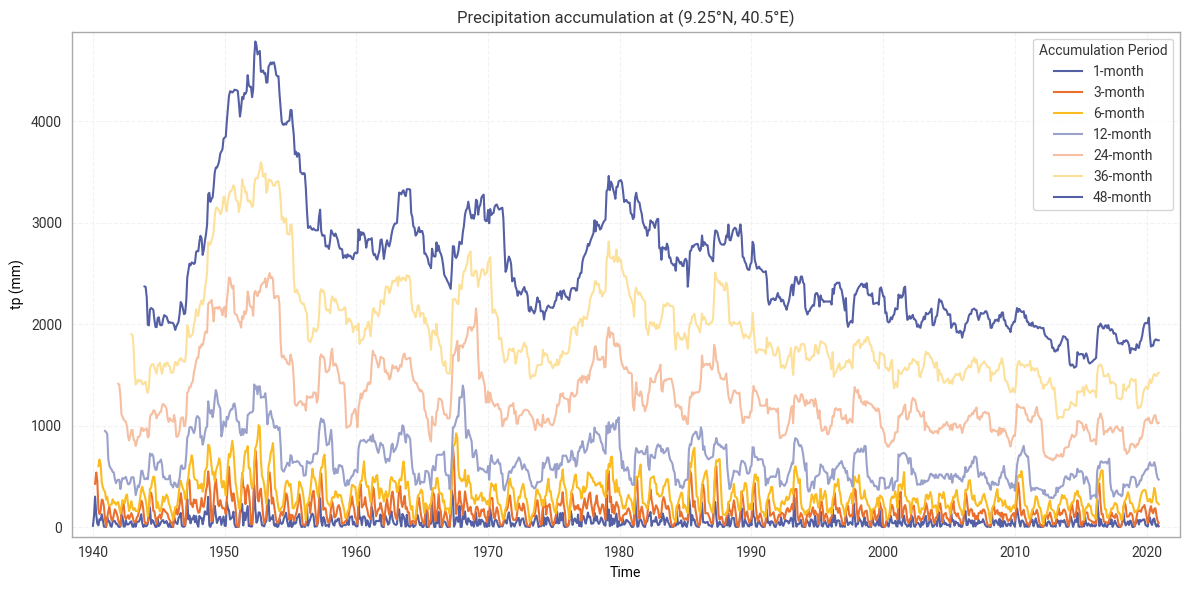

In [43]:
# Assume your dataset is called `data` and already has tp_mm and accumulation variables
# Example accumulation periods
acc_periods = [1, 3, 6, 12, 24, 36, 48]

# Select the grid point and time slice for Ethiopia

point_ds = monthly_sum_prec_reanal

plt.figure(figsize=(12, 6))
for p in acc_periods:
    var_name = f'tp_mm_accum_{p}m'
    plt.plot(point_ds['valid_time'].values, point_ds[var_name].values, label=f'{p}-month')

# Customize plot
plt.title('Precipitation accumulation at (9.25°N, 40.5°E)')
plt.xlabel('Time')
plt.ylabel('tp (mm)')
plt.legend(title='Accumulation Period')
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
# Select the grid point and time slice for Ethiopia
pev_rean = pev_rean.sel(
    latitude=9.25, longitude=40.5, method='nearest'
).sel(valid_time=slice("1940-01-01", "2020-12-31"))

In [47]:
monthly_sum_pev_reanal = accum_var(pev_rean, var="pev")

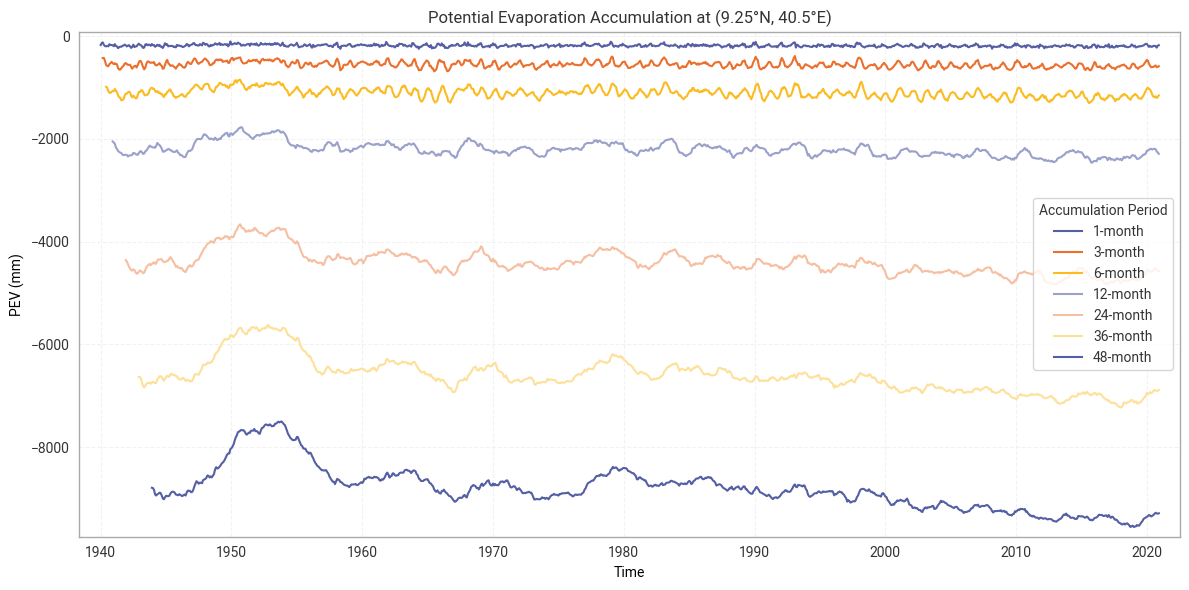

In [48]:
# Assume your dataset is called `data` and already has tp_mm and accumulation variables
# Example accumulation periods
acc_periods = [1, 3, 6, 12, 24, 36, 48]

# Select the grid point and time slice for Ethiopia

point_ds = monthly_sum_pev_reanal

plt.figure(figsize=(12, 6))
for p in acc_periods:
    var_name = f'pev_mm_accum_{p}m'
    plt.plot(point_ds['valid_time'].values, point_ds[var_name].values, label=f'{p}-month')

# Customize plot
plt.title('Potential Evaporation Accumulation at (9.25°N, 40.5°E)')
plt.xlabel('Time')
plt.ylabel('PEV (mm)')
plt.legend(title='Accumulation Period')
plt.grid(True)
plt.tight_layout()
plt.show()

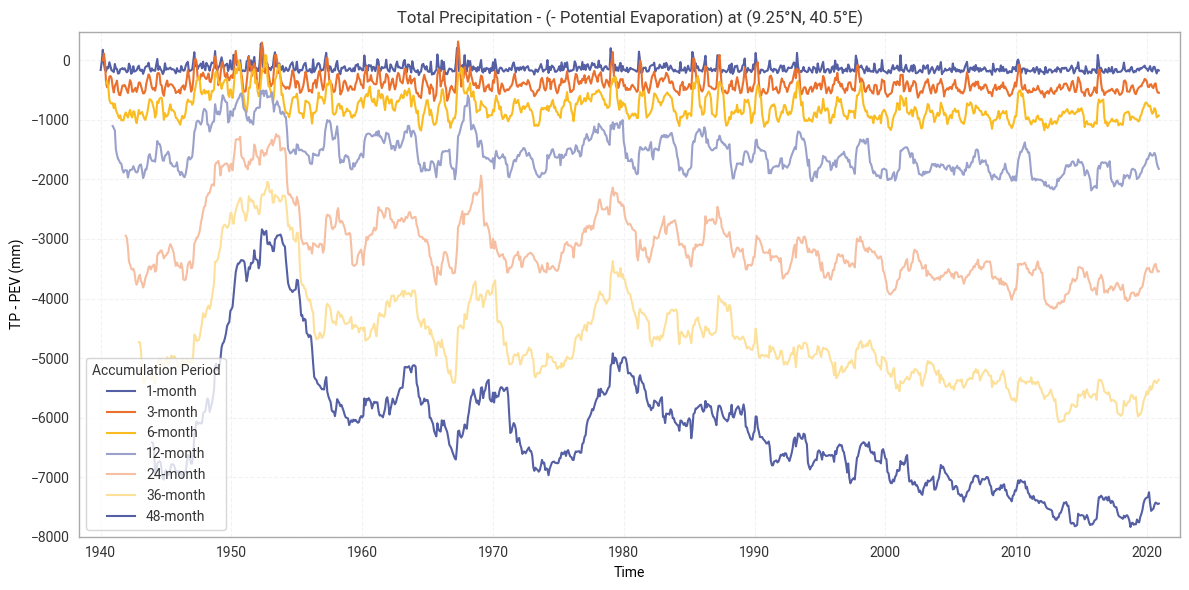

In [50]:
# monthly_diff = monthly_sum_prec_reanal-monthly_sum_pev_reanal


ds_p = monthly_sum_prec_reanal
ds_e = monthly_sum_pev_reanal

# Map matching period variable names between the two datasets
pairs = {
    '1m':  ('tp_mm_accum_1m',  'pev_mm_accum_1m'),
    '3m':  ('tp_mm_accum_3m',  'pev_mm_accum_3m'),
    '6m':  ('tp_mm_accum_6m',  'pev_mm_accum_6m'),
    '12m': ('tp_mm_accum_12m', 'pev_mm_accum_12m'),
    '24m': ('tp_mm_accum_24m', 'pev_mm_accum_24m'),
    '36m': ('tp_mm_accum_36m', 'pev_mm_accum_36m'),
    '48m': ('tp_mm_accum_48m', 'pev_mm_accum_48m'),
}

wb_vars = {}


for k, (p_name, e_name) in pairs.items():
    if (p_name in ds_p) and (e_name in ds_e):
        da_p = ds_p[p_name]
        da_e = ds_e[e_name]           # negative totals

        # If dim/coord names differ, rename one side (yours both use 'forecast_reference_time', so likely fine)
        # Example if needed:
        # da_p = da_p.rename({'time': 'forecast_reference_time'})

        # Align by labels to avoid mismatches
        da_p, da_e = xr.align(da_p, da_e, join='inner')

        # Convert PEV to positive PET and compute water balance
        pet_pos = -da_e
        wb      = (da_p - pet_pos).rename(f'wb_mm_accum_{k}')

        wb_vars[wb.name] = wb

# Build a dataset of water-balance variables
wb_ds = xr.Dataset(wb_vars, coords=da_p.coords)
    
# # Assume your dataset is called `data` and already has tp_mm and accumulation variables
# # Example accumulation periods

acc_periods = [1, 3, 6, 12, 24, 36, 48]

# # Select the grid point and time slice for Ethiopia

plt.figure(figsize=(12, 6))
for p in acc_periods:
    var_name = f'wb_mm_accum_{p}m'
    plt.plot(wb_ds['valid_time'].values, wb_ds[var_name].values, label=f'{p}-month')

# Customize plot
plt.title('Total Precipitation - (- Potential Evaporation) at (9.25°N, 40.5°E)')
plt.xlabel('Time')
plt.ylabel('TP - PEV (mm)')
plt.legend(title='Accumulation Period')
plt.grid(True)
plt.tight_layout()
plt.show()

#### AUX: MARS

In [ ]:
dataset = "reanalysis-era5-complete"
request = {
    "class": "ea",
    "date": "20000101",
    "expver": "1",
    "levtype": "sfc",
    "param": "251.228",
    "stream": "moda",
    "type": "fc",
    "data_format": "netcdf" 
}

mars_pev_rean = ekd.from_source("cds", dataset, request)  # sends the request to CDS
mars_pev_rean = mars_pev_rean.to_xarray()  # convert to xarray.Dataset


In [ ]:
# Select the grid point and time slice for Ethiopia
mars_pev_rean = mars_pev_rean.sel(
    latitude=9.25, longitude=40.5, method='nearest'
)

#### 2. Fit Log-Logistic Distribution to PET

In [51]:
accum_periods = [1, 3, 6, 12, 24, 36, 48]

start_ref, end_ref  = "1991-01-31", "2020-12-31"

# Fit log logistic distributions
log_params = fit_monthly_distributions_xr(wb_ds, accum_periods, start_ref, end_ref, var =  "wb")

In [52]:
# Compute SPI series
spei_ds, cdf_ds = compute_monthly_series_xr(wb_ds, accum_periods, log_params, var_dim = "wb")

In [53]:
dataset = "derived-drought-historical-monthly"
request1 = {
    "variable": ["standardised_precipitation_evapotranspiration_index"],
    "accumulation_period": [
        "1",
        "3",
        "6",
        "12",
        "24",
        "36",
        "48"
    ],
    "version": "1_0",
    "product_type": ["reanalysis"],
    "dataset_type": "consolidated_dataset",
    "year": [
        "1940", "1941", "1942",
        "1943", "1944", "1945",
        "1946", "1947", "1948",
        "1949", "1950", "1951",
        "1952", "1953", "1954",
        "1955", "1956", "1957",
        "1958", "1959", "1960",
        "1961", "1962", "1963",
        "1964", "1965", "1966",
        "1967", "1968", "1969",
        "1970", "1971", "1972",
        "1973", "1974", "1975",
        "1976", "1977", "1978",
        "1979", "1980", "1981"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "area": [9.45, 40.25, 8.95, 40.75]
}

request2 = {
    "variable": ["standardised_precipitation_evapotranspiration_index"],
    "accumulation_period": [
        "1",
        "3",
        "6",
        "12",
        "24",
        "36",
        "48"
    ],
    "version": "1_0",
    "product_type": ["reanalysis"],
    "dataset_type": "consolidated_dataset",
    "year": [
        "1982", "1983", "1984",
        "1985", "1986", "1987",
        "1988", "1989", "1990",
        "1991", "1992", "1993",
        "1994", "1995", "1996",
        "1997", "1998", "1999",
        "2000", "2001", "2002",
        "2003", "2004", "2005",
        "2006", "2007", "2008",
        "2009", "2010", "2011",
        "2012", "2013", "2014",
        "2015", "2016", "2017",
        "2018", "2019", "2020"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "area": [9.45, 40.25, 8.95, 40.75]
}


#### COMPARISON: Plot Calculated SPEI against ERA5 SPEI

In [54]:
data_spei = ekd.from_source("cds", dataset, request1,request2) # Sends request for this dataset to CDS.
data_spei = data_spei.to_xarray(compat="equals") # Converts to xarray.
data_spei = data_spei.sel(lat=9.25,lon=40.5, method="nearest")

2025-12-29 15:49:22,920 INFO [2025-12-03T00:00:00Z] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 307.38it/s]
/home/eg6/c3s2-eqc-quality-assessment/.venv/lib/python3.12/site-packages/earthkit/data/readers/netcdf/fieldlist.py:202: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'time' ('time',) The recommendation is to set join explicitly for this case.
  return xr.open_mfdataset(


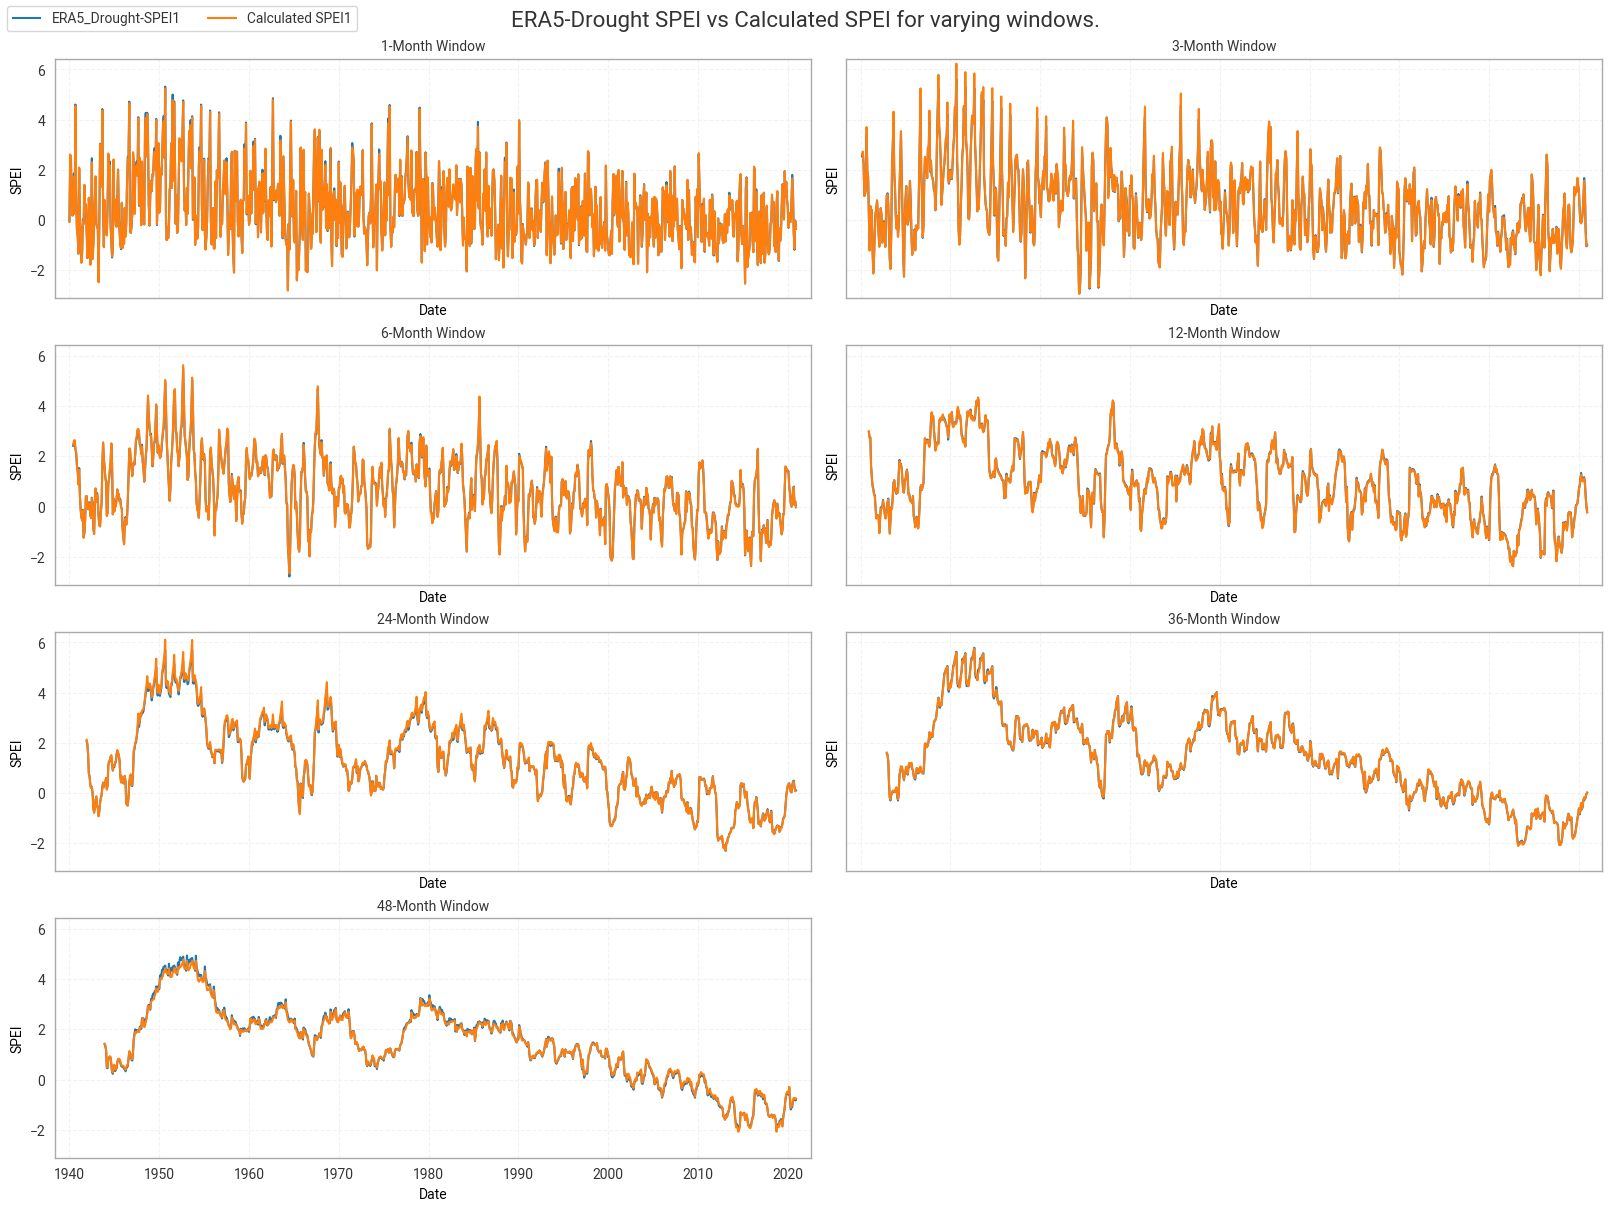

In [56]:
accum_periods = [1, 3, 6, 12, 24, 36, 48]

# Create a 4x4 grid of subplots
fig, axs = plt.subplots(4, 2, figsize=(16, 12), sharex=True, sharey=True, constrained_layout=True)
fig.suptitle('ERA5-Drought SPEI vs Calculated SPEI for varying windows.', fontsize=16)

data_spei_focus, spei_ds_focus = xr.align(data_spei, spei_ds, join = "override")   # only overlapping coords

# Flatten axs for easy indexing
axs = axs.flatten()

for position, period in enumerate(accum_periods):
    ax = axs[position]

    # Plot ERA5 drought SPI
    ax.plot(data_spei_focus[f"SPEI{period}"].time,
            data_spei_focus[f"SPEI{period}"],
            label=f"ERA5_Drought-SPEI{period}",
            color="tab:blue")

    # Plot calculated SPI
    ax.plot(spei_ds_focus[f"SPEI_{period}m"].valid_time,
            spei_ds_focus[f"SPEI_{period}m"],
            label=f"Calculated SPEI{period}",
            color="tab:orange")

    # Title for each subplot
    ax.sharex(axs[0])
    ax.set_title(f"{period}-Month Window", fontsize=10)
    ax.set_xlabel('Date')
    ax.set_ylabel('SPEI')    
    ax.grid(True)

# Remove unused axes
for i in range(len(accum_periods), len(axs)):
    fig.delaxes(axs[i])

# Add a single legend for the whole figure
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper left", ncol=2, frameon=True)
plt.show()

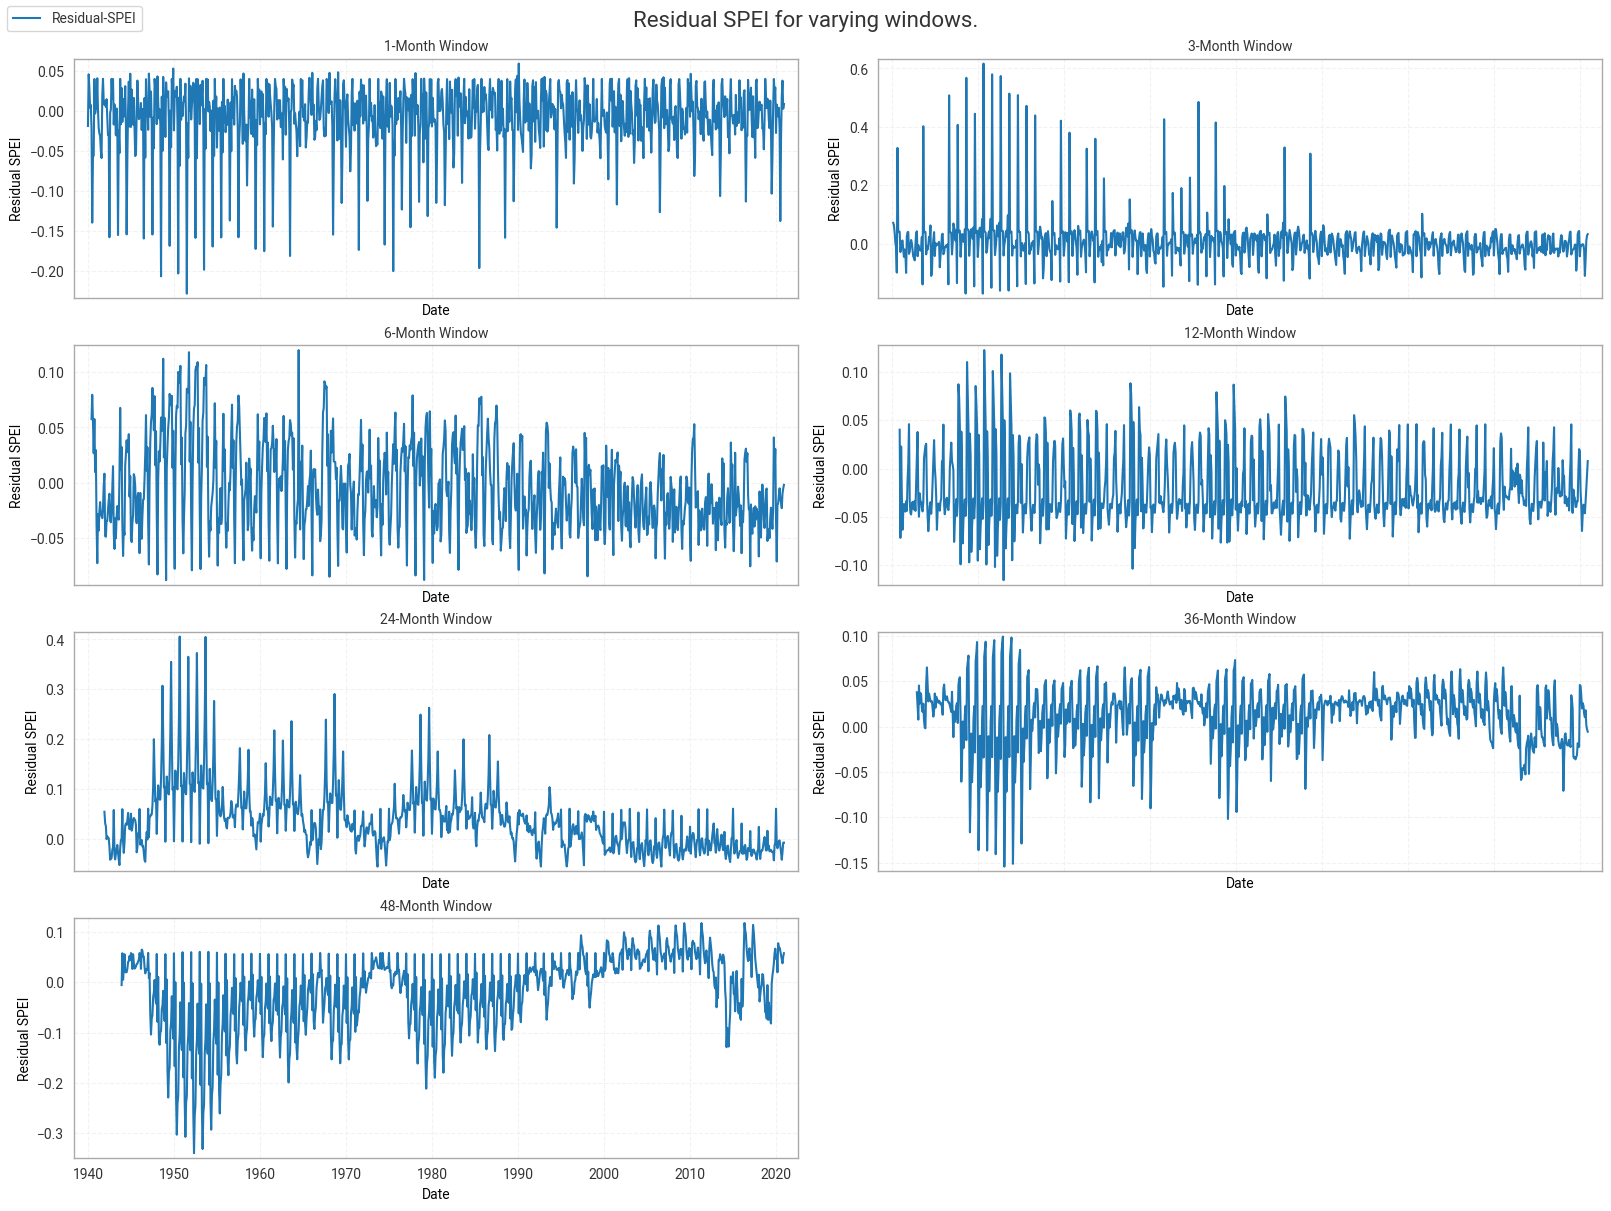

In [57]:
accum_periods = [1, 3, 6, 12, 24, 36, 48]

spei_ds_focus = spei_ds.rename({
    "valid_time": "time",
    "latitude": "lat",
    "longitude": "lon",
}) # for alignment

data_spei_focus, spei_ds_focus = xr.align(data_spei_focus, spei_ds_focus, join = "override")   # only overlapping coords

# Create a 4x4 grid of subplots
fig, axs = plt.subplots(4, 2, figsize=(16, 12), sharex=True, sharey=False, constrained_layout=True)
fig.suptitle('Residual SPEI for varying windows.', fontsize=16)

# Flatten axs for easy indexing
axs = axs.flatten()

for position, period in enumerate(accum_periods):
    ax = axs[position]
    residual  = spei_ds_focus[f"SPEI_{period}m"] - data_spei_focus[f"SPEI{period}"]
    # Plot residual between ERA5-SPI & Calculated-SPI
    ax.plot(residual.time,
            residual,
            label=f"Residual-SPEI",
            color="tab:blue")

    # Title for each subplot
    ax.sharex(axs[0])
    ax.set_title(f"{period}-Month Window", fontsize=10)
    ax.set_xlabel('Date')
    ax.set_ylabel('Residual SPEI')    
    ax.grid(True)
    # ax.set_ylim([-1e-5, 1e-5])

# Remove unused axes
for i in range(len(accum_periods), len(axs)):
    fig.delaxes(axs[i])

# Add a single legend for the whole figure
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper left", ncol=2, frameon=True)
plt.show()

#### 3. Adjust for Quality Flags

In [67]:
accum_periods = [1, 3, 6, 12, 24, 36, 48]

for period in accum_periods:
    drought_spi = data_spei_focus[f"SPEI{period}"].copy()
    calc_spi = spei_ds_focus[f"SPEI_{period}m"].copy() # copy so it doesn't change.
    
    for month in range(1,13):        
        significance = quality_spei_all[f"significance_{period}"].sel(time=f"2020-{month:02d}-01").compute().item()
        if significance == 0:
            drought_spi = drought_spi.where(drought_spi.time.dt.month != month, other=np.nan) # keeps EVERY other month- the selected one becomes nan. 
            calc_spi = calc_spi.where(calc_spi.time.dt.month != month, other=np.nan)
        else:
            pass 
    
    data_drought[f"SPEI{period}"] = drought_spi # bring it back.
    adjusted_spi_ds[f"SPEI_{period}m"] = calc_spi
    

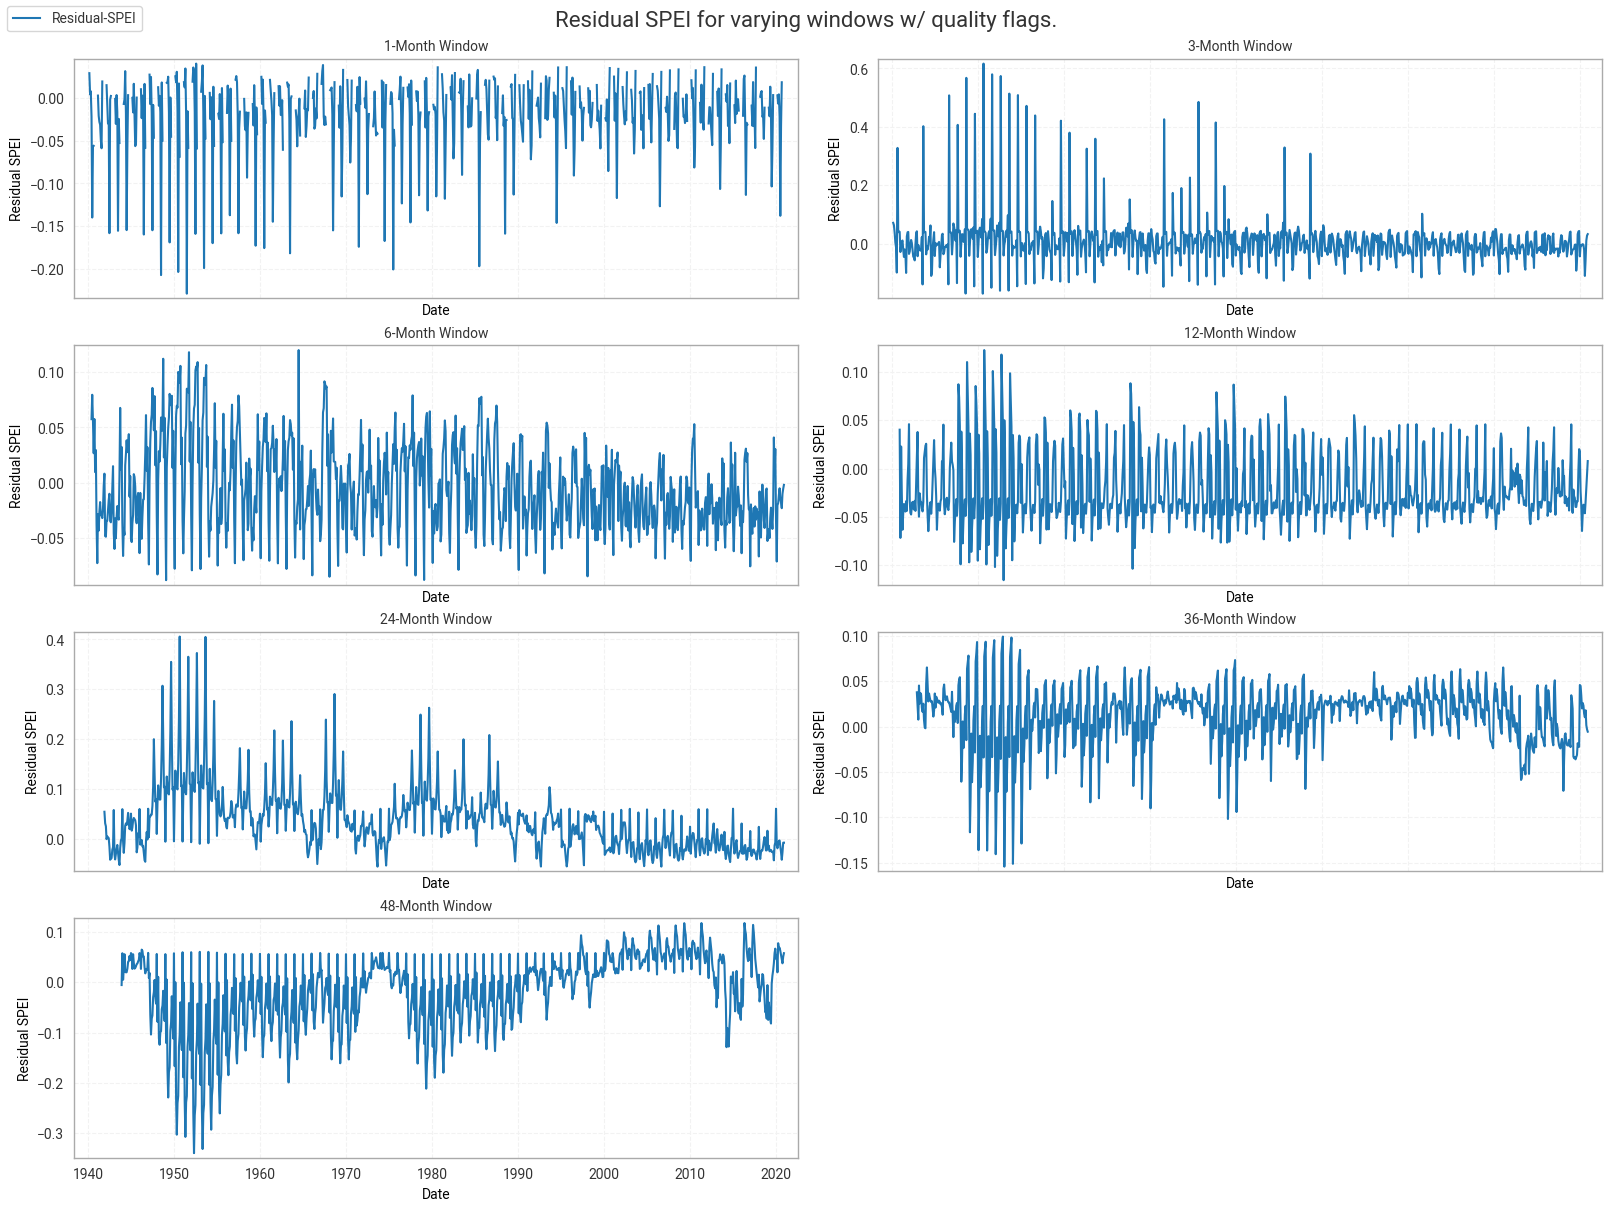

In [69]:
accum_periods = [1, 3, 6, 12, 24, 36, 48]

# data_spei_focus, spei_ds_focus = xr.align(data_spei_focus, spei_ds_focus, join = "override")   # only overlapping coords

# Create a 4x4 grid of subplots
fig, axs = plt.subplots(4, 2, figsize=(16, 12), sharex=True, sharey=False, constrained_layout=True)
fig.suptitle('Residual SPEI for varying windows w/ quality flags.', fontsize=16)

# Flatten axs for easy indexing
axs = axs.flatten()

for position, period in enumerate(accum_periods):
    ax = axs[position]
    residual  = adjusted_spi_ds[f"SPEI_{period}m"] - data_drought[f"SPEI{period}"]
    # Plot residual between ERA5-SPI & Calculated-SPI
    ax.plot(residual.time,
            residual,
            label=f"Residual-SPEI",
            color="tab:blue")

    # Title for each subplot
    ax.sharex(axs[0])
    ax.set_title(f"{period}-Month Window", fontsize=10)
    ax.set_xlabel('Date')
    ax.set_ylabel('Residual SPEI')    
    ax.grid(True)
    # ax.set_ylim([-1e-5, 1e-5])

# Remove unused axes
for i in range(len(accum_periods), len(axs)):
    fig.delaxes(axs[i])

# Add a single legend for the whole figure
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper left", ncol=2, frameon=True)
plt.show()

(section-4)=
### 4. Plotting ERA5 SPI - Ensemble 

#### Subsections
Describe what is done in this step/section and what the `code` in the cell does(if code is included).

#### DATA IMPORT ERA5 SPI- Ensemble (one location)

In [ ]:
spi_ens_dataset = "derived-drought-historical-monthly"
spi_ens_request = {
    "variable": ["standardised_precipitation_index"],
    "accumulation_period": ["12"], # 1 is also already downloaded.
    "version": "1_0",
    "product_type": ["ensemble_members"],
    "dataset_type": "consolidated_dataset",
    "year": [
        "1940", "1941", "1942",
        "1943", "1944", "1945",
        "1946", "1947", "1948",
        "1949", "1950", "1951",
        "1952", "1953", "1954",
        "1955", "1956", "1957",
        "1958", "1959", "1960",
        "1961", "1962", "1963",
        "1964", "1965", "1966",
        "1967", "1968", "1969",
        "1970", "1971", "1972",
        "1973", "1974", "1975",
        "1976", "1977", "1978",
        "1979", "1980", "1981",
        "1982", "1983", "1984",
        "1985", "1986", "1987",
        "1988", "1989", "1990",
        "1991", "1992", "1993",
        "1994", "1995", "1996",
        "1997", "1998", "1999",
        "2000", "2001", "2002",
        "2003", "2004", "2005",
        "2006", "2007", "2008",
        "2009", "2010", "2011",
        "2012", "2013", "2014",
        "2015", "2016", "2017",
        "2018", "2019", "2020",
        "2021", "2022", "2023",
        "2024", "2025"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "area":[-29, 141, -30, 143]
}

longitude = [142]
latitude = [-29.25]

point_drought_ens_ = ekd.from_source("cds", spi_ens_dataset, spi_ens_request) # Sends request for this dataset to CDS.
point_drought_ens_ = point_drought_ens_.to_xarray(compat="equals") # Converts to xarray.

#### DATASET QUALITY: Give each ensemble member unique identifier (one location).

In [78]:
def create_ensemble(dataset, no_ens = 10):
    _, index = np.unique(dataset['time'], return_index=True)
    
    ens_dataset = []
    
    for i in range(0,no_ens):
        ens_member = dataset.isel(time = index + i)    
        ens_dataset.append(ens_member)
        
    drought_ens = xr.concat(ens_dataset, dim="number")
    drought_ens = drought_ens.assign_coords(number=np.arange(10))  # or 1..10 if you prefer

    return drought_ens
    
drought_ens = create_ens(point_drought_ens_)

#### VISUAL : Plotting each ensemble member vs time (one location, SPI-1) w/ thresholds.

NameError: name 'drought_ens_mean' is not defined

<Figure size 1200x600 with 0 Axes>

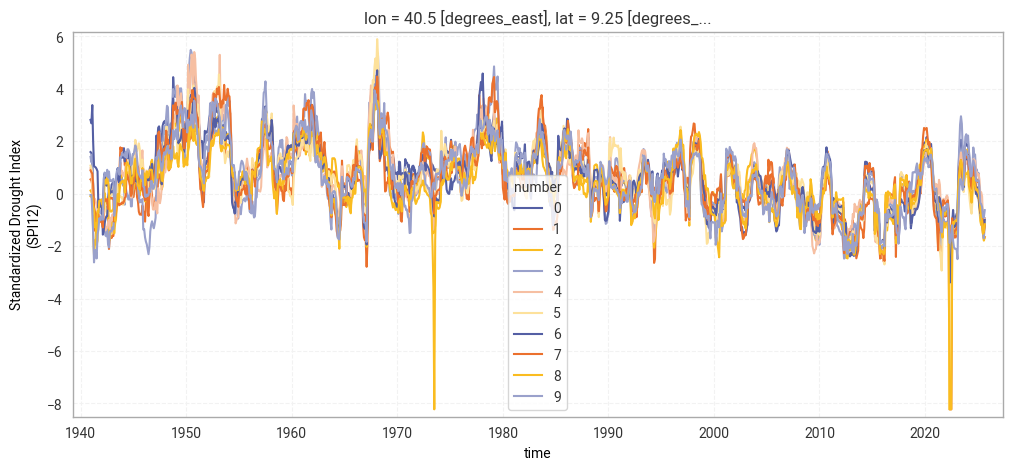

In [79]:
da = drought_ens['SPI12']  # select the DataArray

plt.figure(figsize=(12, 6))

da.transpose('time', 'number').plot.line(x='time', hue='number', add_legend=True,
    figsize=(12, 5),
)
plt.hlines(y=[-1.5, 1.5], xmin=drought_ens_mean['time'].values.min(), xmax=drought_ens_mean['time'].values.max(), colors='r', linestyles='--', 
           label = "Thresholds")
# Customize plot
plt.title('SPI12 — Ensemble members over time')
plt.xlabel('Time')
plt.ylabel('SPI-12')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Plot ensemble mean & standard dev (one location, SPI-1) w/ Thresholds.

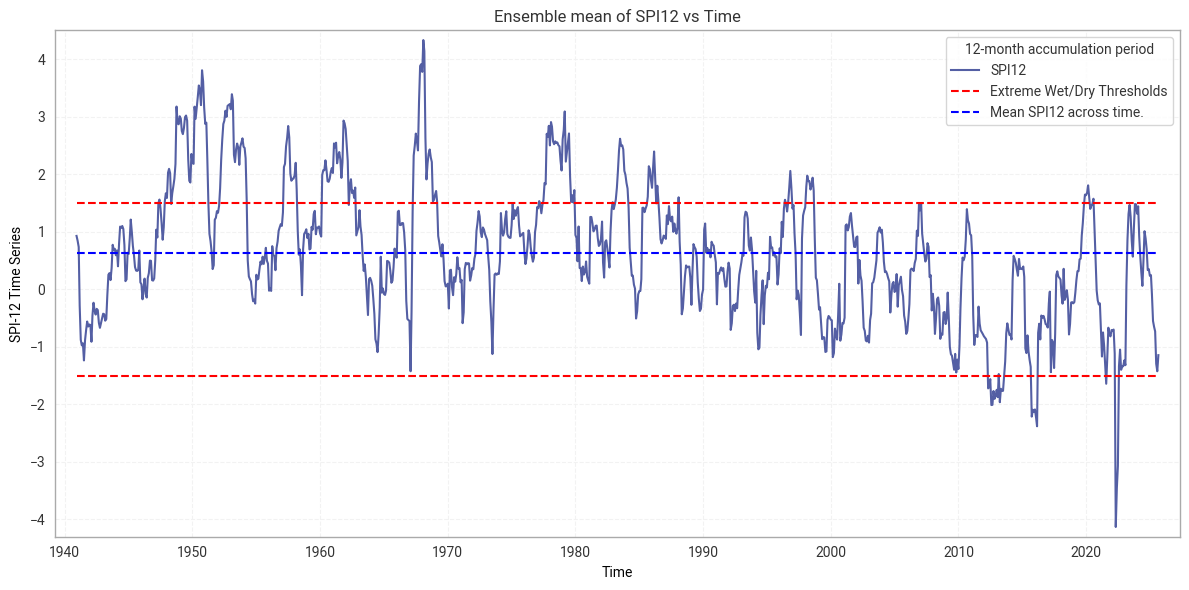

In [89]:
drought_ens_mean = drought_ens.mean(dim="number")
drought_ens_std = drought_ens.std(dim="number")/np.sqrt(10-1)

plt.figure(figsize=(12, 6))

plt.plot(drought_ens_mean['time'].values, drought_ens_mean["SPI12"].values, label=f'SPI12')

# Two threshold lines
plt.hlines(y=[-1.5, 1.5],
           xmin=drought_ens_mean['time'].values.min(),
           xmax=drought_ens_mean['time'].values.max(),
           colors='r', linestyles='--', label='Extreme Wet/Dry Thresholds')

# Mean line
mean_spi12 = drought_ens_mean["SPI12"].mean().values
plt.hlines(y=mean_spi12,
           xmin=drought_ens_mean['time'].values.min(),
           xmax=drought_ens_mean['time'].values.max(),
           colors='b', linestyles='--', label='Mean SPI12 across time.')


plt.title('Ensemble mean of SPI12 vs Time')
plt.xlabel('Time')
plt.ylabel('SPI-12 Time Series')
plt.legend(title='12-month accumulation period')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Number of SPI greater than threshold value.

In [81]:
da = drought_ens["SPI12"]  # dims: ('time',)

threshold_mag = 2

exceeds = np.abs(da) > threshold_mag # boolean xarray with all values that are "severely" wet/drier than usual.

count_per_time = exceeds.sum(dim='number') # count number that exceed along the ensemble dimension.

fractional_count_per_time = count_per_time / 10

percent_per_time = fractional_count_per_time*100

#### Plot of Mean, Stdev & P( > Severe Threshold ). 

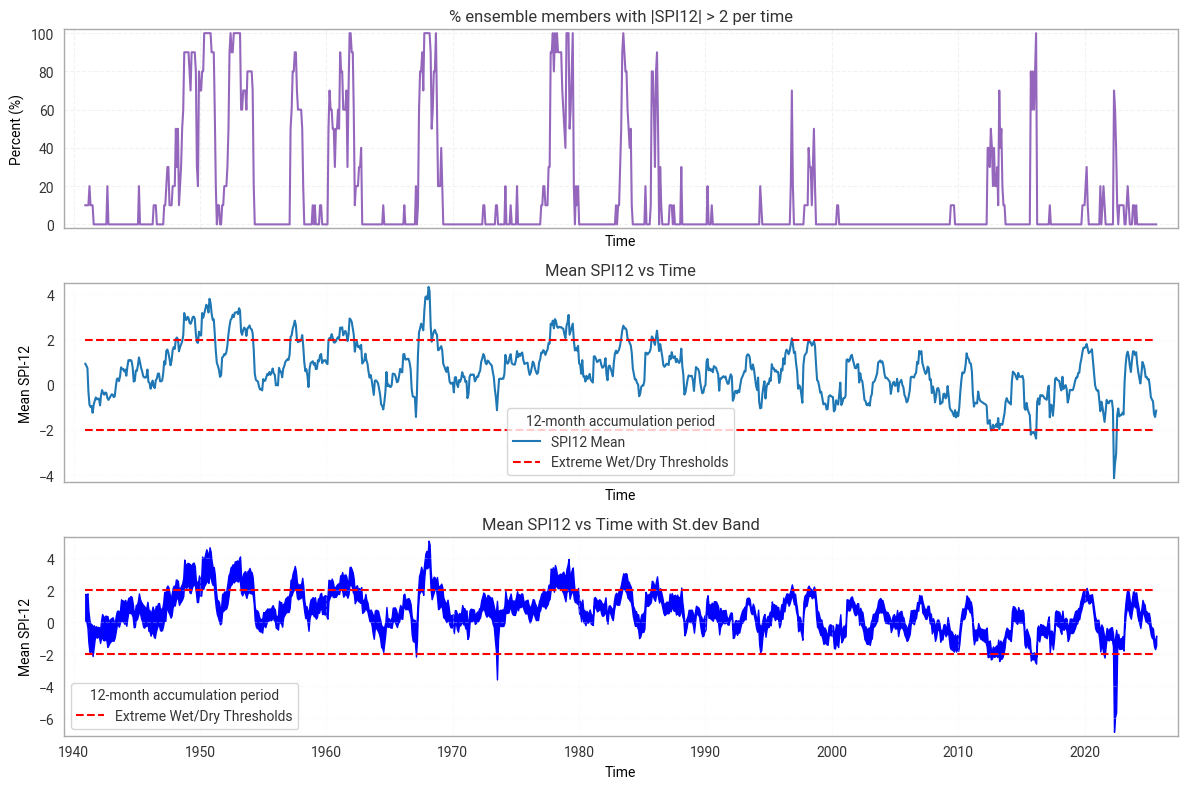

In [82]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(12, 8), sharex=True)

# --- Top panel: % members exceeding ---
percent_per_time.plot(ax=ax1, color='tab:purple')
ax1.set_title(f'% ensemble members with |SPI12| > {threshold_mag} per time')
ax1.set_ylabel('Percent (%)')
ax1.set_xlabel('Time')
ax1.grid(True)

# --- 2nd panel: Ensemble band ---
ci = drought_ens_std['SPI12'].values*np.sqrt(10-1) # confidence interval
y = drought_ens_mean['SPI12'].values
t = drought_ens_mean['time'].values

ax2.plot(t,y,label='SPI12 Mean', color='tab:blue')

# Horizontal thresholds ±2
ax2.hlines(y=[-threshold_mag, threshold_mag],
           xmin=drought_ens_mean['time'].values.min(),
           xmax=drought_ens_mean['time'].values.max(),
           colors='r', linestyles='--', label='Extreme Wet/Dry Thresholds')

ax2.set_title('Mean SPI12 vs Time')
ax2.set_xlabel('Time')
ax2.set_ylabel('Mean SPI-12')
ax2.legend(title='12-month accumulation period')
ax2.grid(True, alpha=0.3)


# --- 3nd panel: Ensemble band ---
ci = drought_ens_std['SPI12'].values*np.sqrt(10-1) # confidence interval
y = drought_ens_mean['SPI12'].values
t = drought_ens_mean['time'].values

# ax2.plot(t,y.values,label='SPI1 Mean', color='tab:blue')
ax3.fill_between(t, (y-ci), (y+ci), color='b')

# Horizontal thresholds ±1.5
ax3.hlines(y=[-threshold_mag, threshold_mag],
           xmin=drought_ens_mean['time'].values.min(),
           xmax=drought_ens_mean['time'].values.max(),
           colors='r', linestyles='--', label='Extreme Wet/Dry Thresholds')

ax3.set_title('Mean SPI12 vs Time with St.dev Band')
ax3.set_xlabel('Time')
ax3.set_ylabel('Mean SPI-12')
ax3.legend(title='12-month accumulation period')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### Heat map of probability exceeding threshold

In [ ]:
import matplotlib.dates as mdates

t = percent_per_time['time'].values
y = percent_per_time.values

fig, ax = plt.subplots(figsize=(12, 2.8))

# Create a 2D array with one "row" so imshow can display it
heat = y[None, :]  # shape (1, T)

# Use extent to align x with datetime range
t_num = mdates.date2num(t)
extent = (t_num.min(), t_num.max(), 0, 1)

im = ax.imshow(
    heat,
    aspect='auto',
    cmap='RdBu_r',
    vmin=0, vmax=100,
    extent=extent
)

ax.set_yticks([])  # hide vertical axis (it's a strip)
ax.set_title('% ensemble members with |SPI12| > 1.5 (timeline color strip)')
ax.set_xlabel('Time')

# Ticks on time
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

cbar = plt.colorbar(im, ax=ax, pad=0.02)
cbar.set_label('Percent exceeding (%)')

plt.tight_layout()
plt.show()


#### Plot of |Mean(SPI)| > 1.5  & P( |SPI| > 1.5 ) > 0.5 

####  P( |SPI| > 1.5 )  calculated from # of ensemble members greater than threshold.

In [ ]:
da = drought_ens_mean["SPI12"]  # dims: ('time',)

probability_mag = 0.5 

cond_both = (np.abs(da > threshold_mag) & (fractional_count_per_time > probability_mag))

da_hit = da.sel(time=cond_both)

timestamps = da_hit.time.values

print(timestamps)

#### Histogram ensemble standard dev vs # quality flag (one location, one window)

In [ ]:
data = drought_ens_std["SPI12"]
sig = quality_spi_all["significance_12"]

thresholds = np.arange(0.1, 1.4, 0.1)  # 0.1 .. 1.5
bad_counts_cum = np.zeros_like(thresholds, dtype=int)
good_counts_cum = np.zeros_like(thresholds, dtype=int)

for month in range(1,13):
        significance = quality_spi_all[f"significance_1"].sel(time=f"2020-{month:02d}-01").compute().item()
        if significance == 0:
            vals = data.where(data.time.dt.month == month, drop=True).values
            bad_counts_cum += (vals[:, None] < thresholds[None, :]).sum(axis=0) # then sum along column.
            # bad_counts_cum[j] = number of vals that are < thresholds[j]
            # B[i, j] = (vals[i] < thresholds[j])
        else:
            vals = data.where(data.time.dt.month == month, drop=True).values
            good_counts_cum += (vals[:, None] < thresholds[None, :]).sum(axis=0)

In [ ]:
bad_bins  = np.diff(np.concatenate(([0], bad_counts_cum)))
good_bins = np.diff(np.concatenate(([0], good_counts_cum)))
total_bins = bad_bins + good_bins
good_norm = good_bins / total_bins
bad_norm = bad_bins / total_bins

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(thresholds, good_norm, width = 0.1, color='blue', alpha=0.8, label='Quality = 1 (good)')
ax.bar(thresholds, bad_norm, width = 0.1,  color='red', bottom = good_norm, alpha=0.9, label='Quality = 0 (bad)')

ax.set_xlabel('Uncertainty in SPI1 (0.1 bin)')
ax.set_ylabel('% count of good/bad months (stacked)')
ax.set_title('% counts (stacked) for each uncertainty bin')
ax.set_xticks(thresholds)
ax.set_xticklabels([f'{t:.1f}' for t in thresholds])
ax.grid(True, linestyle='--', alpha=0.35)
ax.legend()
plt.tight_layout()
plt.show()



#### Reading in ERA5 SPI- Ensemble (global, 2 years)

In [84]:
dataset = "derived-drought-historical-monthly"
request = {
    "variable": ["standardised_precipitation_index"],
    "accumulation_period": ["48"],
    "version": "1_0",
    "product_type": ["ensemble_members"],
    "dataset_type": "consolidated_dataset",
    "year": [
        "2023",
        "2024"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
}

In [ ]:
data_drought_ens = ekd.from_source("cds", dataset, request) # Sends request for this dataset to CDS.
data_drought_ens = data_drought_ens.to_xarray(compat="equals") # Converts to xarray.

#### Function to create the data into ensemble set.

In [86]:
# Function to reshape time into (time=24, ensemble=10)
def make_ensemble(spi):
    arr = np.asarray(spi)  # Convert memoryview or dask chunk to NumPy
    reshaped = arr.reshape(24, 10)
    return reshaped
 
# Apply across all lat/lon
ensemble = xr.apply_ufunc(
    make_ensemble,
    data_drought_ens["SPI48"],  # DataArray with dims (time, lat, lon)
    input_core_dims=[["time"]],
    output_core_dims=[["time", "ensemble"]],
    exclude_dims={"time"},
    vectorize=True,
    dask="parallelized",
    output_dtypes=[float],
    dask_gufunc_kwargs={"allow_rechunk": True},
    output_sizes={"time": 24, "ensemble": 10},
)
 
# Assign coordinates
ensemble = ensemble.assign_coords({
    "time": pd.date_range("2023-01-01", periods=24, freq="MS"),
    "ensemble": range(1, 11)
})
ensemble.name = "SPI48"

/tmp/ipykernel_449/315377700.py:8: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ensemble = xr.apply_ufunc(


#### Selecting ensemble member 1.

In [ ]:
ensemble = ensemble.sel(ensemble=1)

In [ ]:
spi_values = ensemble.compute()

#### Calculating mean and stdev over all ensemble members.

In [90]:
ensemble_mean = ensemble.mean(dim="ensemble", skipna=True)  # shape: (lat, lon, time)
ensemble_std = ensemble.std(dim="ensemble", skipna=True)  # shape: (lat, lon, time)

In [91]:
ensemble_mean_time = abs(ensemble_mean).mean(dim="time", skipna=True)  # shape: (lat, lon, time)
ensemble_std_time = ensemble_std.std(dim="time", skipna=True)  # shape: (lat, lon, time)

In [ ]:
ensemble_std = ensemble_std.compute()  # Load into memory for plotting
ensemble_std_time = ensemble_std_time.compute() 

ensemble_mean = ensemble_mean.compute()  # Load into memory for plotting
ensemble_mean_time = ensemble_mean_time.compute()

#### Plot of mean vs stdev over all ensemble members.

/home/eg6/c3s2-eqc-quality-assessment/.venv/lib/python3.12/site-packages/dask/array/numpy_compat.py:58: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


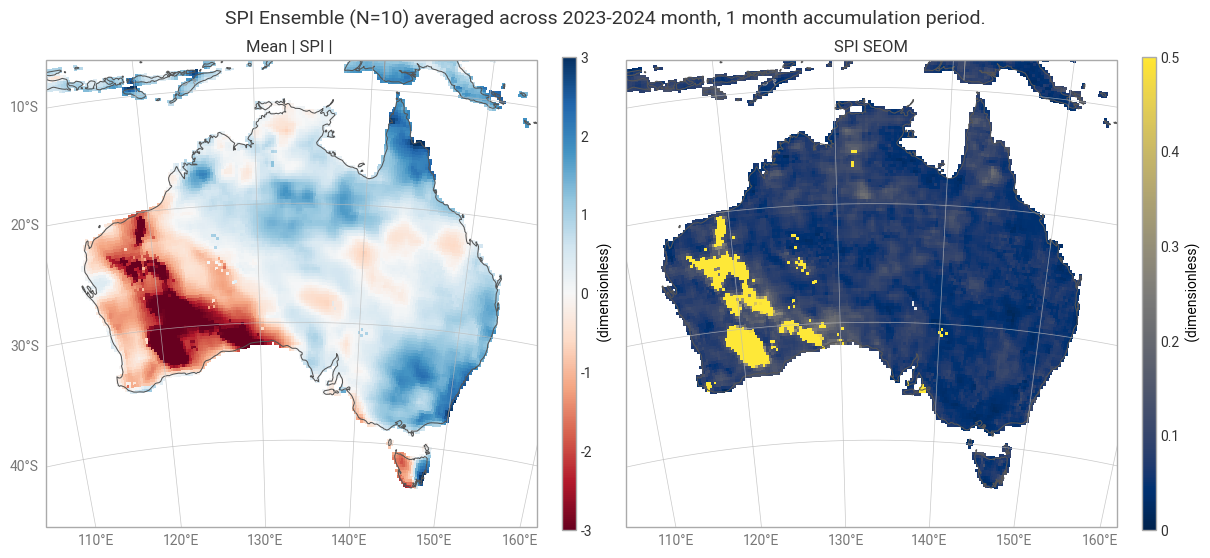

In [92]:
# Select one time slice and one ensemble
from earthkit.plots.styles import Style

global_std_map = ensemble_std.sel(time="2024-05-01")  # shape (lat, lon)
global_mean_map = ensemble_mean.sel(time="2024-05-01")

# global_std_map = ensemble_std_time
# global_mean_map = ensemble_mean_time

# Convert to NumPy arrays

std_values = global_std_map.to_numpy()/np.sqrt(10)
mean_values = global_mean_map.to_numpy()

lat_values = global_mean_map.lat.to_numpy()
lon_values = global_mean_map.lon.to_numpy()
 
# Create meshgrid

lon_grid, lat_grid = np.meshgrid(lon_values, lat_values)
 
# # Plot with EarthKit

SPI_STYLE = Style(cmap='RdBu', vmin = -3, vmax = 3, normalize=False)
SPI_SEOM_STYLE = Style(cmap='cividis', vmin = 0, vmax = 0.5, normalize=False) # _r for reversing colorbar.

# Create figure with 2 columns
fig = ekp.Figure(rows=1, columns=2, size=(12, 6))  # <-- Important!

# First subplot (left)
subplot = fig.add_map(domain="Australia", row=0, column=0)
subplot.grid_cells(mean_values, x=lon_grid, y=lat_grid,style=SPI_STYLE)
subplot.legend(location="right")

# Second subplot (right)
subplot1 = fig.add_map(domain="Australia", row=0, column=1)
subplot1.grid_cells(std_values, x=lon_grid, y=lat_grid, style = SPI_SEOM_STYLE)
subplot1.legend(location="right")

subplot.title("Mean | SPI | ")
subplot1.title("SPI SEOM")

# Add decorations
fig.title("SPI Ensemble (N=10) averaged across 2023-2024 month, 1 month accumulation period.")
fig.land()
fig.coastlines()
fig.borders()
fig.gridlines()
fig.show()


#### Plot of P( |SPI48| >= 2 ) over entire region, for one time.

In [107]:
da = ensemble  # dims: ('time',)

threshold_mag = 2

exceeds = np.abs(da) >= threshold_mag # boolean xarray with all values that are "severely" wet/drier than usual.

count_per_time = exceeds.sum(dim='ensemble') # count number that exceed along the ensemble dimension.

fractional_count_per_time = count_per_time / 10

percent_per_time = fractional_count_per_time*100

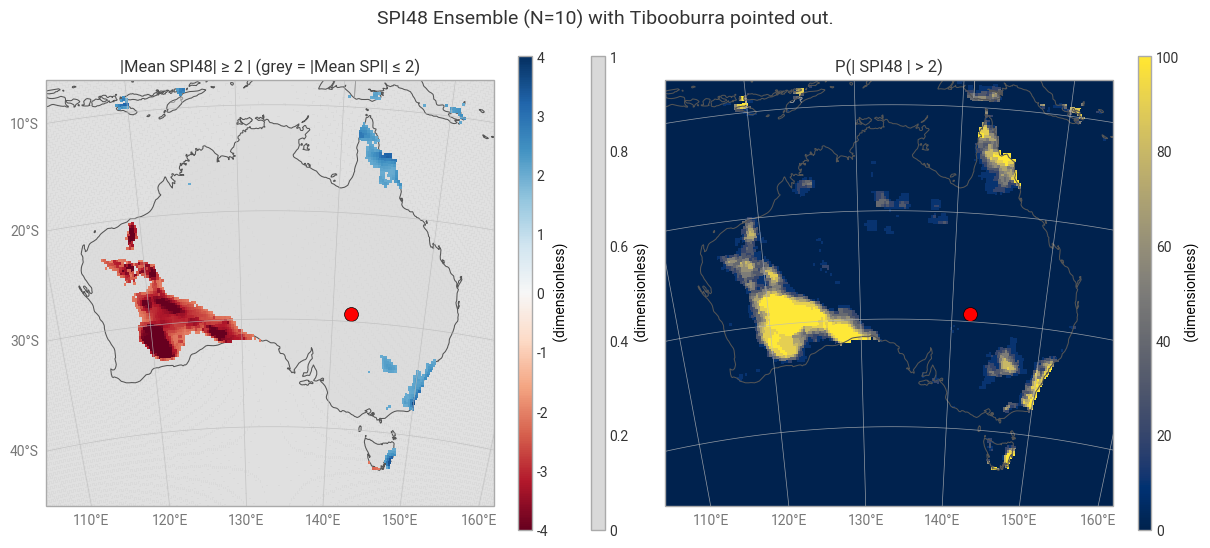

In [129]:

from matplotlib.colors import ListedColormap
from earthkit.plots.styles import Style

# --- Define mask FIRST ---
extreme_mask = (mean_values >= 2) | (mean_values <= -2)

# Build a constant-valued mask for the grey layer:
# 1 where non-extreme (|SPI| ≤ 2), NaN where extreme (so extremes won't be drawn in grey)
nonextreme_const = np.where(~extreme_mask, 1.0, np.nan)

# For the colored overlay, keep only extreme values (NaN elsewhere)
mean_extremes = np.where(extreme_mask, mean_values, np.nan)

# --- Styles ---
# Single-colour style for non-extremes: ensure a tight 0–1 range
GREY_STYLE = Style(
    cmap=ListedColormap(["#d9d9d9"]),
    vmin=0, vmax=1,
    normalize=False
)

# SPI style for extremes; use a symmetric range that suits your data
SPI_STYLE = Style(
    cmap='RdBu',
    vmin=-4, vmax=4,    # adjust to your expected SPI range
    normalize=False
)

# --- Plot ---
fig = ekp.Figure(rows=1, columns=2, size=(12, 6))

# Left subplot: mean SPI48 with grey background for non-extremes
subplot = fig.add_map(domain="Australia", row=0, column=0)

# Draw grey background first
subplot.grid_cells(
    nonextreme_const, x=lon_grid, y=lat_grid,
    style=GREY_STYLE, zorder=1, alpha=0.8  # alpha to ensure visibility
)

# Overlay extremes with color
subplot.grid_cells(
    mean_extremes, x=lon_grid, y=lat_grid,
    style=SPI_STYLE, zorder=2
)

subplot.legend(location="right")


subplot.title("|Mean SPI48| ≥ 2 | (grey = |Mean SPI| ≤ 2)")

longitude = [142]
latitude = [-29.25]

# Plot the point as a scatter plot
subplot.scatter(x=longitude, y=latitude, color='red', marker='o', s=100, label = "Tibooburra")

# Right subplot (unchanged example)
SPI_SEOM_STYLE = Style(cmap='cividis', normalize=False)
subplot1 = fig.add_map(domain="Australia", row=0, column=1)
subplot1.grid_cells(percent_values, x=lon_grid, y=lat_grid, style=SPI_SEOM_STYLE)
subplot1.legend(location="right")
subplot1.title("P(| SPI48 | > 2)")
subplot1.scatter(x=longitude, y=latitude, color='red', marker='o', s=100, label = "Tibooburra")

fig.title("SPI48 Ensemble (N=10) with Tibooburra pointed out.")
fig.land(); fig.coastlines(); fig.borders(); fig.gridlines()
fig.show()



#### Analysing uncertainty correlation.

In [ ]:
spi_mean = ensemble_mean_time
spi_seom = ensemble_std_time / np.sqrt(10)

spi_mean = np.where((np.abs(spi_mean) <= 3) , spi_mean, np.nan)
spi_seom = np.where((np.abs(spi_mean) <= 3), spi_seom, np.nan)

# Flatten & mask
x = spi_mean.ravel()          # SPI mean
y = spi_seom.ravel()   # SPI standard uncertainty (N=10)
mask = np.isfinite(x) & np.isfinite(y)
x = x[mask]; y = y[mask]

In [ ]:
# Plot
plt.figure(figsize=(8, 6), dpi=160)
plt.scatter(x, y, s=8, alpha=0.5, color="#1f77b4", edgecolors="none")
plt.xlabel("Mean | SPI-1 |")
plt.ylabel("SPI-1 Standard Uncertainty of the mean (N=10)")
plt.title("Mean | SPI-1 | vs SPI-1 SUOM for SPI <= 3 across 2023-2024")
plt.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()

In [ ]:

# Masks (ignore NaNs in x or y)
mask_neg = (x < 0) & np.isfinite(x) & np.isfinite(y)
mask_pos = (x >= 0) & np.isfinite(x) & np.isfinite(y)

n_neg = np.count_nonzero(mask_neg)
n_pos = np.count_nonzero(mask_pos)

# Compute means; if group empty, set to None
mean_y_neg = float(np.nanmean(y[mask_neg])) if n_neg > 0 else None
mean_y_pos = float(np.nanmean(y[mask_pos])) if n_pos > 0 else None

# Helper for formatting
def fmt_mean(m):
    return f"{m:.4f}" if m is not None and np.isfinite(m) else "NA"

print("Group summaries:")
print(f"  x < 0    -> n = {n_neg:4d}, mean(y) = {fmt_mean(mean_y_neg)}")
print(f"  x >= 0   -> n = {n_pos:4d}, mean(y) = {fmt_mean(mean_y_pos)}")


In [ ]:
# --- your scatter (unchanged) ---
# Assign colors based on sign of x
colors = np.where(x < 0, 'red', 'blue')

plt.figure(figsize=(8, 6), dpi=160)
plt.scatter(
    x, y,
    s=8,
    alpha=0.5,
    color=colors,
    edgecolors='none'
)

plt.xlabel("Mean SPI-1")
plt.ylabel("SPI-1 Standard Uncertainty of the mean (N=10)")
plt.title("Mean SPI-1 vs SPI-1 SUOM for SPI <= 3 across 2023-2024")
plt.grid(True, alpha=0.25)
plt.tight_layout()

# --- compute means (ignore NaNs in x or y) ---
mask_neg = (x < 0) & np.isfinite(x) & np.isfinite(y)
mask_pos = (x >= 0) & np.isfinite(x) & np.isfinite(y)

n_neg = int(np.count_nonzero(mask_neg))
n_pos = int(np.count_nonzero(mask_pos))

mean_y_neg = float(np.nanmean(y[mask_neg])) if n_neg > 0 else None
mean_y_pos = float(np.nanmean(y[mask_pos])) if n_pos > 0 else None

def fmt_mean(m):
    return f"{m:.4f}" if (m is not None and np.isfinite(m)) else "NA"

# --- print on the plot as text boxes ---
ax = plt.gca()

# Left text box (x < 0)
left_text = f"SPI-1 < 0:\n  n = {n_neg}\n  mean(SPI SUOM) = {fmt_mean(mean_y_neg)}"
ax.text(
    0.02, 0.98, left_text,
    transform=ax.transAxes,
    va='top', ha='left',
    color='red',
    fontsize=10,
    bbox=dict(facecolor='white', edgecolor='red', alpha=0.9, boxstyle='round,pad=0.3')
)

# Right text box (x >= 0)
right_text = f"SPI-1 >= 0:\n  n = {n_pos}\n  mean(SPI SUOM) = {fmt_mean(mean_y_pos)}"
ax.text(
    0.98, 0.98, right_text,
    transform=ax.transAxes,
    va='top', ha='right',
    color='blue',
    fontsize=10,
    bbox=dict(facecolor='white', edgecolor='blue', alpha=0.9, boxstyle='round,pad=0.3')
)

# Optional: vertical reference line at x = 0
ax.axvline(0, color='k', linestyle=':', linewidth=1.2, alpha=0.7)

plt.show()

#### Plot of mean ensemble Standard Uncertainty of the Mean vs Time (Australia)

In [ ]:

# -----------------------
# 1) Global mean time series
# -----------------------
# Simple average over lat/lon for each time
global_ts = ensemble_std.mean(dim=("lat", "lon"), skipna=True)
global_ts.name = "global_mean_std"

# -----------------------
# 2) Australia domain mean time series
# -----------------------
# Define a rectangular box that covers mainland Australia
# Adjust if you want to include territories or use a different extent.
AU_LAT_MIN, AU_LAT_MAX = -45.0, -5.0
AU_LON_MIN, AU_LON_MAX = 100.0, 160.0

# If your longitude coordinate is 0..360, these bounds already work.
# If it's -180..180, they also work (Australia is at positive longitudes).

lat_sel = (ensemble_std["lat"] >= AU_LAT_MIN) & (ensemble_std["lat"] <= AU_LAT_MAX)
lon_sel = (ensemble_std["lon"] >= AU_LON_MIN) & (ensemble_std["lon"] <= AU_LON_MAX)

ensemble_std_au = ensemble_std.where(lat_sel & lon_sel, drop=True)
aus_ts = ensemble_std_au.mean(dim=("lat", "lon"), skipna=True)
aus_ts.name = "australia_mean_std"

# -----------------------
# 3) Plot
# -----------------------
plt.figure(figsize=(10, 5), dpi=140)
plt.plot(global_ts["time"], global_ts, label="Global mean std", lw=1.8)
plt.plot(aus_ts["time"], aus_ts, label="Australia mean std", lw=1.8)
plt.title("Mean Ensemble Standard Deviation — Global vs Australia (unweighted)")
plt.xlabel("Time")
plt.ylabel("Standard deviation")
plt.grid(True, alpha=0.25)
plt.legend()
plt.tight_layout()
pltplt.show()

# -----------------------
# 4) Optional: Export as DataFrame
# -----------------------
df = xr.merge([global_ts, aus_ts]).to_dataframe()


(section-5)=
### 5. Calculating the SPI/SPEI Ensemble Data

#### Results Subsections

#### Reading in ensemble precipitation 

In [ ]:
dataset = "reanalysis-era5-single-levels-monthly-means"
request = {
    "product_type": ["monthly_averaged_ensemble_members"],
    "variable": ["total_precipitation"],
    "year": [
        "1940", "1941", "1942",
        "1943", "1944", "1945",
        "1946", "1947", "1948",
        "1949", "1950", "1951",
        "1952", "1953", "1954",
        "1955", "1956", "1957",
        "1958", "1959", "1960",
        "1961", "1962", "1963",
        "1964", "1965", "1966",
        "1967", "1968", "1969",
        "1970", "1971", "1972",
        "1973", "1974", "1975",
        "1976", "1977", "1978",
        "1979", "1980", "1981",
        "1982", "1983", "1984",
        "1985", "1986", "1987",
        "1988", "1989", "1990",
        "1991", "1992", "1993",
        "1994", "1995", "1996",
        "1997", "1998", "1999",
        "2000", "2001", "2002",
        "2003", "2004", "2005",
        "2006", "2007", "2008",
        "2009", "2010", "2011",
        "2012", "2013", "2014",
        "2015", "2016", "2017",
        "2018", "2019", "2020",
        "2021", "2022", "2023",
        "2024", "2025"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "time": ["00:00"],
    "data_format": "grib",
    "download_format": "unarchived"
}


In [ ]:
tp_ens = ekd.from_source("cds", dataset, request) # Sends request for this dataset to CDS.
tp_ens = tp_ens.to_xarray() # Converts to xarray.
tp_ens = tp_ens.assign_coords(number=tp_ens.number + 1)
tp_ens_sel = tp_ens.sel(latitude=9.5, longitude=40.5, method='nearest')

#### Selecting drought index from ensemble at one location (lon=9.5, lat = 40.5)

In [ ]:
point_drought_ens_ = point_drought_ens_.sel(lon = 9.5, lat = 40.5)

In [ ]:
def make_ensemble(da, time_dim="time", member_dim="member"):
    times = pd.Index(da[time_dim].values)
    member_ids = pd.Series(times).groupby(times).cumcount().to_numpy()
    
    # Create MultiIndex
    mi = pd.MultiIndex.from_arrays([times, member_ids], names=[time_dim, member_dim])
    
    # Assign MultiIndex and rename the dimension to something temporary
    da = da.rename({time_dim: "tmp"}).assign_coords(tmp=mi)
    
    # Unstack to get (time, member)
    return da.unstack()

ens = make_ensemble(point_drought_ens_["SPI1"])  # or pass the whole Dataset

#### Ensemble spread along with 48-month rolling average in SPI.

In [ ]:
point_ens_std = ens.std(dim = "member") / np.sqrt(10)
point_ens_mean = ens.mean(dim = "member")

point_ens_std_rolling = point_ens_mean.rolling(
    time=48, center=False, min_periods=48
).mean()


In [ ]:
# Make a clean time vs stdev plot

plt.figure(figsize=(10, 5))
plt.plot(point_ens_mean.time.values, point_ens_mean.values,
         color='tab:blue', lw=1.3, alpha=0.45, label='Mean (monthly)')
plt.plot(point_ens_std_rolling.time.values, point_ens_std_rolling.values,
         color='tab:green', lw=2.4, marker='o', label='4-year mean (calendar)')

plt.xlabel("Forecast reference time")
plt.ylabel("Mean across ensemble (SPI)")
plt.title("Ensemble mean of SPI over time (yearly mean overlay) at (lon, lat) : (40.5, 9.5)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

In [ ]:

# Compute rolling mean for the ensemble mean SPI (same window as stdev)
point_ens_mean_rolling = point_ens_mean.rolling(
    time=3, center=False, min_periods=3
).mean()

# Create side-by-side subplots
fig, axes = plt.subplots(2, 1, figsize=(16, 5), sharex=True)

# --- Left: Std. dev over time ---
axes[0].plot(
    point_ens_std.time.values, point_ens_std.values,
    color='tab:blue', lw=1.3, alpha=0.45, label='Std. dev (monthly)'
)
axes[0].plot(
    point_ens_std_rolling.time.values, point_ens_std_rolling.values,
    color='tab:green', lw=2.4, marker='o', label='4-year stdev mean (calendar)'
)
axes[0].set_xlabel("Forecast reference time")
axes[0].set_ylabel("Std. dev across ensemble (SPI)")
axes[0].set_title("Ensemble spread of SPI over time\n(yearly mean overlay) at (lon, lat) : (40.5, 9.5)")
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# --- Right: Mean SPI over time ---
axes[1].plot(
    point_ens_mean.time.values, point_ens_mean.values,
    color='tab:orange', lw=1.3, alpha=0.55, label='Mean SPI (monthly)'
)
axes[1].plot(
    point_ens_mean_rolling.time.values, point_ens_mean_rolling.values,
    color='tab:red', lw=2.4, marker='o', label='4-year mean (calendar)'
)
axes[1].set_xlabel("Forecast reference time")
axes[1].set_ylabel("Mean SPI")
axes[1].set_title("Ensemble mean SPI over time\n(yearly mean overlay) at (lon, lat) : (40.5, 9.5)")
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()


In [ ]:

# Rolling mean for ensemble mean SPI (same window as stdev)
point_ens_mean_rolling = point_ens_mean.rolling(
    time=3, center=False, min_periods=3
).mean()

fig, ax_left = plt.subplots(figsize=(14, 5))

# --- Left y-axis: Std. dev ---
lns1 = ax_left.plot(
    point_ens_std.time.values, point_ens_std.values,
    color='tab:blue', lw=1.3, alpha=0.45, label='Std. dev (monthly)'
)
lns2 = ax_left.plot(
    point_ens_std_rolling.time.values, point_ens_std_rolling.values,
    color='tab:green', lw=2.0, marker='o', label='Std. dev 4-year mean'
)
ax_left.set_ylabel("Std. dev across ensemble (SPI)", color='tab:blue')
ax_left.tick_params(axis='y', labelcolor='tab:blue')
ax_left.grid(True, alpha=0.3)

# --- Right y-axis: Mean SPI ---
ax_right = ax_left.twinx()
lns3 = ax_right.plot(
    point_ens_mean.time.values, point_ens_mean.values,
    color='tab:orange', lw=1.3, alpha=0.55, label='Mean SPI (monthly)'
)
lns4 = ax_right.plot(
    point_ens_mean_rolling.time.values, point_ens_mean_rolling.values,
    color='tab:red', lw=2.0, marker='o', label='Mean SPI 4-year mean'
)
ax_right.set_ylabel("Mean SPI", color='tab:orange')
ax_right.tick_params(axis='y', labelcolor='tab:orange')

# --- Shared x-axis and title ---
ax_left.set_xlabel("Forecast reference time")
ax_left.set_title("Std. dev vs Mean SPI over time (two y-axes)\n(lon, lat) : (40.5, 9.5)")

# --- Unified legend combining both axes ---
lines = lns1 + lns2 + lns3 + lns4
labels = [l.get_label() for l in lines]
ax_left.legend(lines, labels, loc='upper left')

plt.tight_layout()


In [ ]:
point_ens_mean = ens.mean(dim="member")
point_ens_stdev = ens.std(dim="member")  # replace with SEM if preferred

t = point_ens_mean.time.values
y = point_ens_mean.values
spread = point_ens_stdev.values  # or SEM

plt.figure(figsize=(12, 5))

# Mean line
plt.plot(t, y, color='tab:orange', lw=1.8, label='Mean SPI')

# Shaded band for uncertainty
plt.fill_between(
    t, y - spread, y + spread,
    color='tab:blue', alpha=0.2, label='± stdev across ensemble'
)

plt.xlabel("Forecast reference time")
plt.ylabel("Mean SPI")
plt.title("Ensemble mean SPI with ± stdev band over time\n(lon, lat): (40.5, 9.5)")
plt.grid(True, alpha=0.3)
plt.ylim([-3, 3])
plt.legend()
plt.tight_layout()



#### Ensemble spread of total precipitation over time.

In [ ]:
# Compute stdev across ensemble members (dimension: 'number')
tp_ens_sel = tp_ens_sel.sel(forecast_reference_time = slice('1940-01-31T18:00:00.000000000','2025-09-30T18:00:00.000000000'))
tp_std = tp_ens_sel['tp'].std(dim='number')  # result dims: (forecast_reference_time)
tp_mean = tp_ens_sel['tp'].mean(dim='number')  # result dims: (forecast_reference_time)

# Make a clean time vs stdev plot
plt.figure(figsize=(10, 5))
plt.scatter(point_ens_mean.values, point_ens_std.values, color='tab:blue')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


#### Ensemble spread along with 48-month rolling average in tp.

In [ ]:
# Compute stdev across ensemble members
tp_std = tp_ens_sel['tp'].mean(dim='number')

tp_std_monthly = tp_std.rolling(
    forecast_reference_time=48, center=False, min_periods=48
).mean()

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(tp_std['forecast_reference_time'].values, tp_std.values,
         color='tab:blue', lw=1.3, alpha=0.45, label='Std. dev (monthly)')
plt.plot(tp_std_monthly['forecast_reference_time'].values, tp_std_monthly.values,
         color='tab:green', lw=2.4, marker='o', label='4-year mean (calendar)')

plt.xlabel("Forecast reference time")
plt.ylabel("Mean across ensemble (tp)")
plt.title("Ensemble mean of tp over time (yearly mean overlay) at (lon, lat) : (40.5, 9.5)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

In [ ]:
# collapsable code cell

# code is included for transparency but also learning purposes and gives users the chance to adapt the code used for the assessment as they wish

## ℹ️ If you want to know more

### Key resources

List some key resources related to this assessment. E.g. CDS entries, applications, dataset documentation, external pages.
Also list any code libraries used (if applicable).

Code libraries used:
* [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control`,  prepared by [B-Open](https://www.bopen.eu/)

### References

List the references used in the Notebook here.

E.g.

[[1]](https://doi.org/10.1038/s41598-018-20628-2) Rodriguez, D., De Voil, P., Hudson, D., Brown, J. N., Hayman, P., Marrou, H., & Meinke, H. (2018). Predicting optimum crop designs using crop models and seasonal climate forecasts. Scientific reports, 8(1), 2231.